In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimpy import skim
import scipy.stats as st
import seaborn as sns
from itertools import combinations
import numpy as np

In [2]:
df = pd.read_csv("Fast_Food_nonull.csv")

# Data Visualization

In [3]:
# Splitting the data into categorical and continuous
cat_feats = df.select_dtypes(include = ['object']).columns
cont_feats = df.select_dtypes(exclude = ['object']).columns

# Univariate Analysis of Categorical Features

1. Restaurant


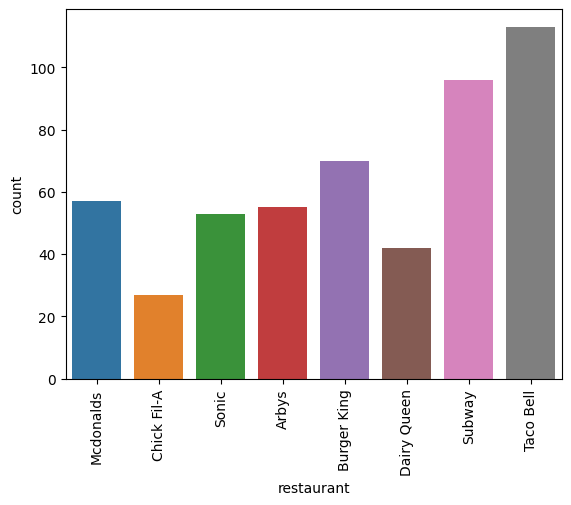

 
count           513
unique            8
top       Taco Bell
freq            113
Name: restaurant, dtype: object
unique value: ['Mcdonalds' 'Chick Fil-A' 'Sonic' 'Arbys' 'Burger King' 'Dairy Queen'
 'Subway' 'Taco Bell']
------------------------------------------------------------------------------------------
 
3. Salad


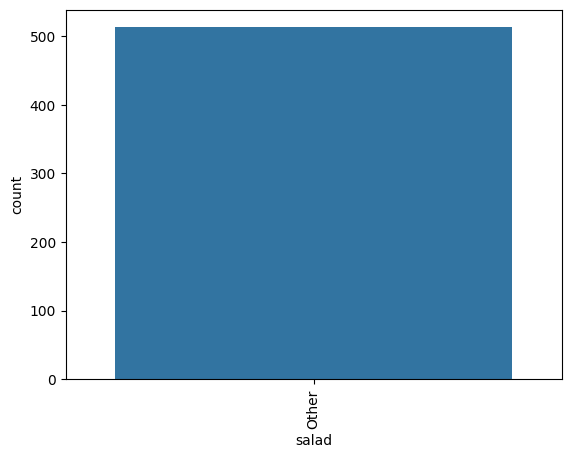

 
count       513
unique        1
top       Other
freq        513
Name: salad, dtype: object
unique value: ['Other']
------------------------------------------------------------------------------------------
 


In [4]:
# restaurant & salad
cat = []

for num, x in enumerate(cat_feats, 1):
    if len(df[x].unique()) <= 16:
        print(f'{num}. {x.replace("_", " ").capitalize()}')
        sns.countplot(data = df, x = x)
        plt.xticks(rotation = 90)
        plt.show()
        cat.append(x)
        print(' ')
        print(df[x].describe())
        print(f'unique value: {df[x].unique()}')
        print('-' * 90)
        print(' ')


In [5]:
# Unique values in item
len(df['item'].unique())

505

count                         513
unique                        505
top       Crispy Chicken Sandwich
freq                            3
Name: item, dtype: object
--------------------------------------------------------------------------------
Unique value:  <bound method Series.unique of 0               Artisan Grilled Chicken Sandwich
1                 Single Bacon Smokehouse Burger
2                 Double Bacon Smokehouse Burger
3      Grilled Bacon Smokehouse Chicken Sandwich
4       Crispy Bacon Smokehouse Chicken Sandwich
                         ...                    
508            Original Triple Double Crunchwrap
509               Spicy Triple Double Crunchwrap
510                       Fiesta Taco Salad-Beef
511                    Fiesta Taco Salad-Chicken
512                      Fiesta Taco Salad-Steak
Name: item, Length: 513, dtype: object>


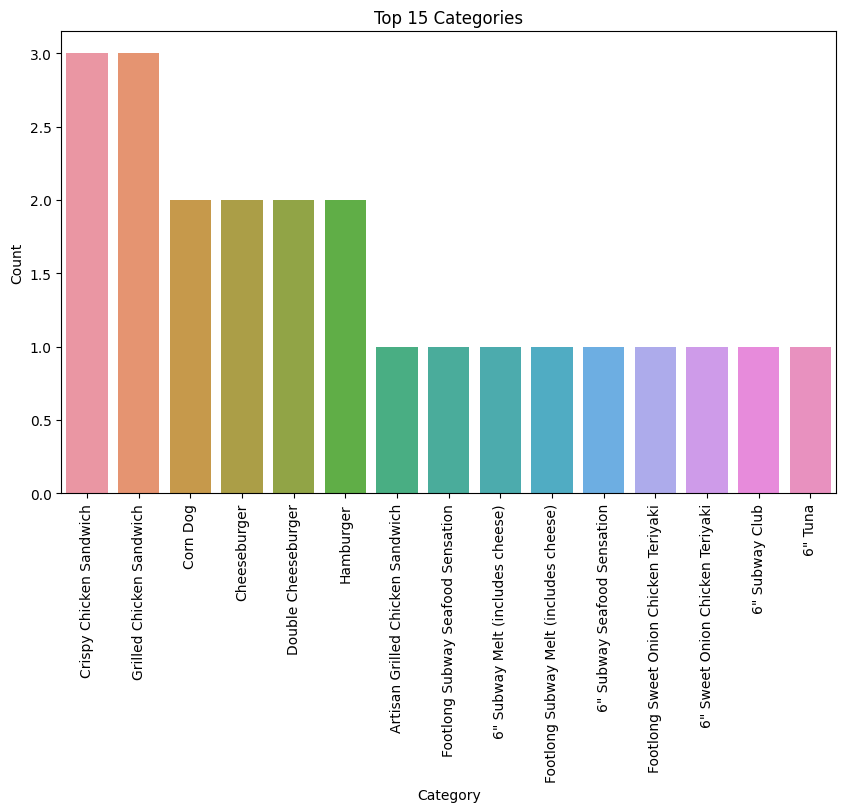

In [6]:
# Univariate analysis on top N items
top_n = 15  # Number of items to show
top_categories = df['item'].value_counts().nlargest(top_n).index # Finding the top 15 

# Subset DataFrame with only the top categories
subset_df = df[df['item'].isin(top_categories)]

# Plot
plt.figure(figsize = (10, 6))
sns.countplot(data = subset_df, x = 'item', order = top_categories)
plt.xticks(rotation = 90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title(f'Top {top_n} Categories')
print(df['item'].describe())
print("-"*80)
print("Unique value: ", df['item'].unique)
plt.show()

This shows that: 
- Three restaurants have Crispy/Grilled Chicken Sandwiches in their menu.
- Corn Dog, Cheeseburger, Double Cheese Burger, and Hamburger seem to be a popular choice amongst restaurants as well.
- The remaining menu items are unique to their restaurants.

# Bivariate Analysis (Inbetween Categorical Features)

Restaurant: Taco Bell, Unique Menu Items: 113
Restaurant: Subway, Unique Menu Items: 96
Restaurant: Burger King, Unique Menu Items: 70
Restaurant: Mcdonalds, Unique Menu Items: 57
Restaurant: Arbys, Unique Menu Items: 55
Restaurant: Sonic, Unique Menu Items: 53
Restaurant: Dairy Queen, Unique Menu Items: 42
Restaurant: Chick Fil-A, Unique Menu Items: 27


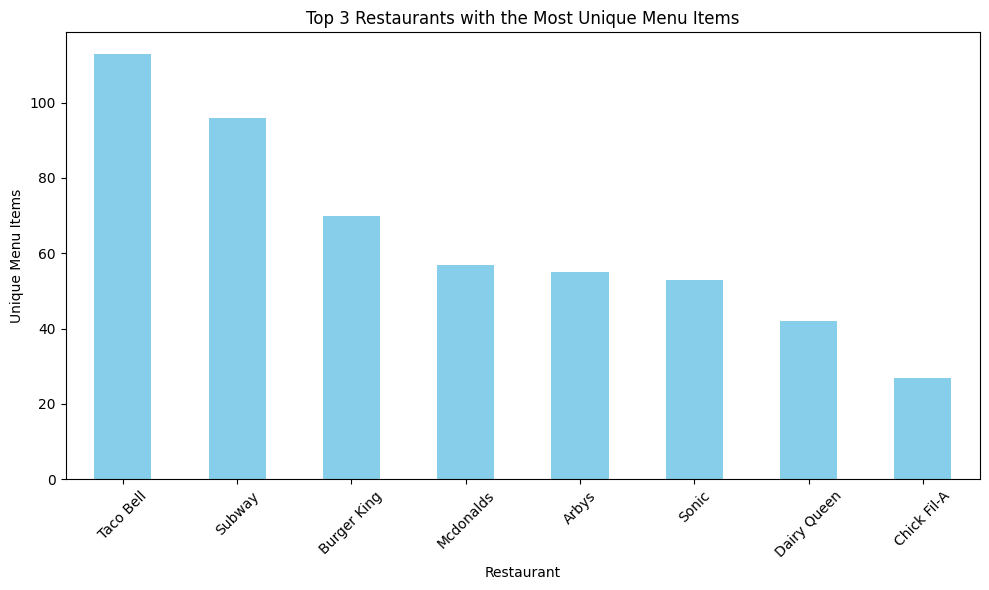

In [7]:
# Finding the restaurants with the highest umber of menu items

restaurant_menu_counts = df.groupby('restaurant')['item'].nunique()

sorted_restaurants = restaurant_menu_counts.sort_values(ascending = False)

# Get the top 5 restaurants with the most unique menu items
top_restaurants = sorted_restaurants.head(8)

for restaurant, unique_items in top_restaurants.items():
    print(f'Restaurant: {restaurant}, Unique Menu Items: {unique_items}')

plt.figure(figsize=(10, 6))
top_restaurants.plot(kind='bar', color='skyblue')
plt.xlabel('Restaurant')
plt.ylabel('Unique Menu Items')
plt.title('Top 3 Restaurants with the Most Unique Menu Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Taco Bell is the restaurant with the most menu items.
- Chick Fil-A seems to have the least menu items.
- Mcdonalds and Arbys alomst have the same number of unique menu items.

In [8]:
# Dropping 'salad' due to lack of information
df.drop("salad", axis = 1, inplace = True)

# Univariate Analysis of Continuous Features

In [9]:
# Function for outlier detection
def outlier(x):  # Calculating Quartiles
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1  # Calculating the IQR
    lower_fence = q1 - 1.5 * iqr # Calculating the lower fence 
    upper_fence = q3 + 1.5 * iqr # Calculating the upper fence
    

    non_outlier = []  # If datapoint falls within the upper and lower fence its considered a non_outlier
    for num in x:
        if num >= lower_fence and num <= upper_fence:
            non_outlier.append(num)
    lower_whisker = np.min(non_outlier) # The lower and upper whiskers are calculated as the minimum and maximum values within the non_outlier list, respectively.
    upper_whisker = np.max(non_outlier)
    
    
    outlier = [] # If datapoint doesn't fall within the upper and lower fence its considered an outlier
    for num in x:
        if num < lower_fence or num > upper_fence:
            outlier.append(num)
    
    outlier_count = len(outlier)
    
    print('lower_whisker: {}'.format(lower_whisker))
    print('upper_whisker: {}'.format(upper_whisker))
    print('outlier counts: {}'.format(outlier_count))

1. calories


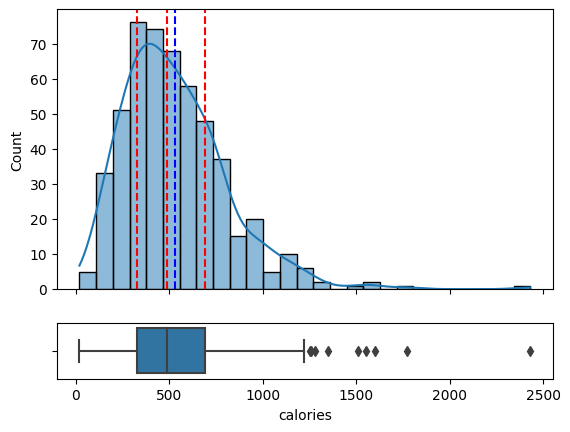

 
count     513.000000
mean      531.111111
std       282.900251
min        20.000000
25%       330.000000
50%       490.000000
75%       690.000000
max      2430.000000
Name: calories, dtype: float64
 
lower_whisker: 20
upper_whisker: 1220
outlier counts: 9
 
Data skewed with skew: 10.121160715563146
 
Data not normal
--------------------------------------------------
 
2. cal_fat


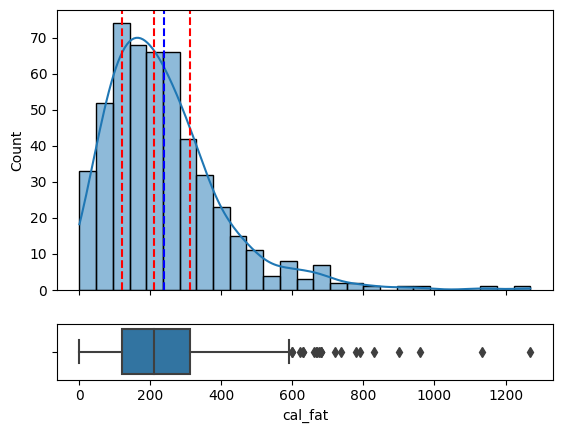

 
count     513.000000
mean      238.945419
std       166.683320
min         0.000000
25%       120.000000
50%       210.000000
75%       310.000000
max      1270.000000
Name: cal_fat, dtype: float64
 
lower_whisker: 0
upper_whisker: 590
outlier counts: 21
 
Data skewed with skew: 11.719889251373198
 
Data not normal
--------------------------------------------------
 
3. total_fat


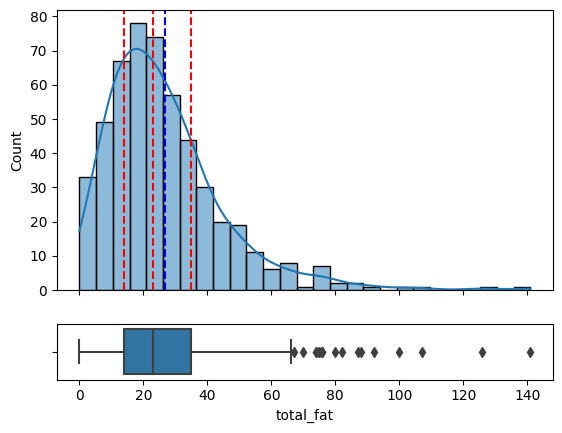

 
count    513.000000
mean      26.604288
std       18.442620
min        0.000000
25%       14.000000
50%       23.000000
75%       35.000000
max      141.000000
Name: total_fat, dtype: float64
 
lower_whisker: 0
upper_whisker: 66
outlier counts: 18
 
Data skewed with skew: 11.760884440325434
 
Data not normal
--------------------------------------------------
 
4. sat_fat


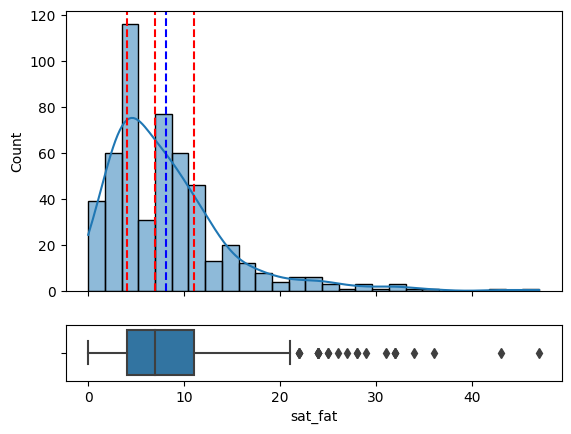

 
count    513.000000
mean       8.152047
std        6.431223
min        0.000000
25%        4.000000
50%        7.000000
75%       11.000000
max       47.000000
Name: sat_fat, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 21.0
outlier counts: 24
 
Data skewed with skew: 12.658755734579328
 
Data not normal
--------------------------------------------------
 
5. trans_fat


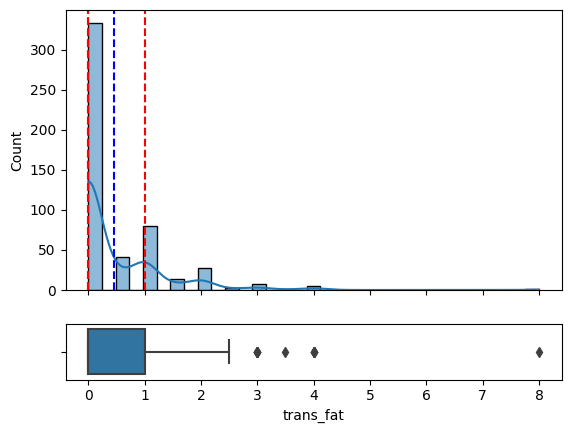

 
count    513.000000
mean       0.462963
std        0.840615
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: trans_fat, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 2.5
outlier counts: 14
 
Data skewed with skew: 15.600711530979684
 
Data not normal
--------------------------------------------------
 
6. cholesterol


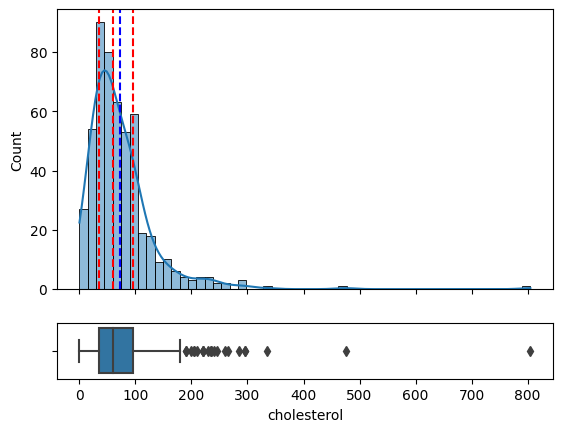

 
count    513.000000
mean      72.553606
std       63.259522
min        0.000000
25%       35.000000
50%       60.000000
75%       95.000000
max      805.000000
Name: cholesterol, dtype: float64
 
lower_whisker: 0
upper_whisker: 180
outlier counts: 23
 
Data skewed with skew: 18.499835983042622
 
Data not normal
--------------------------------------------------
 
7. sodium


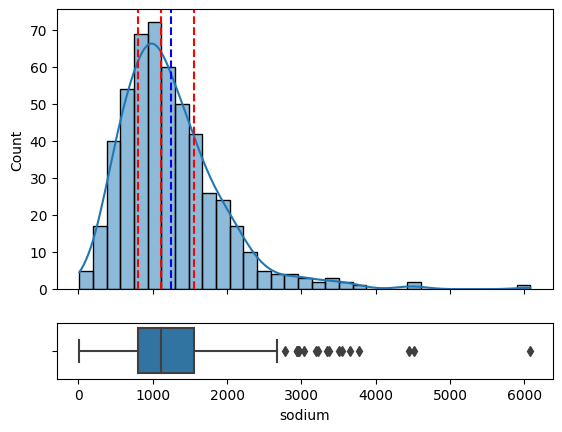

 
count     513.000000
mean     1247.309942
std       691.157795
min        15.000000
25%       800.000000
50%      1110.000000
75%      1550.000000
max      6080.000000
Name: sodium, dtype: float64
 
lower_whisker: 15
upper_whisker: 2670
outlier counts: 18
 
Data skewed with skew: 11.811885679395255
 
Data not normal
--------------------------------------------------
 
8. total_carb


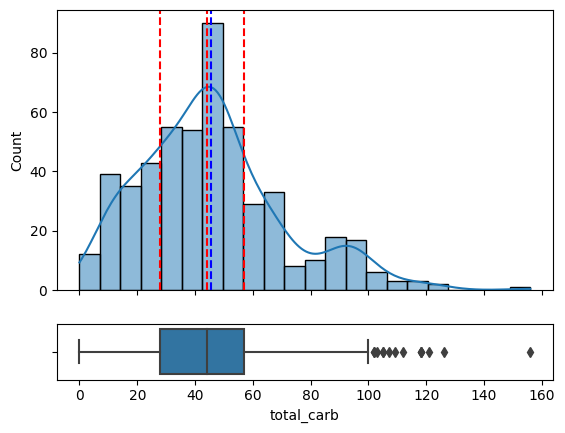

 
count    513.000000
mean      45.647173
std       24.924070
min        0.000000
25%       28.000000
50%       44.000000
75%       57.000000
max      156.000000
Name: total_carb, dtype: float64
 
lower_whisker: 0
upper_whisker: 100
outlier counts: 14
 
Data skewed with skew: 6.6876980504132595
 
Data not normal
--------------------------------------------------
 
9. fiber


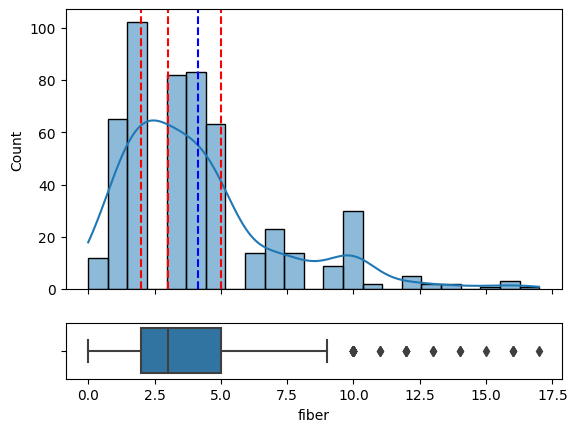

 
count    513.000000
mean       4.127745
std        3.002546
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       17.000000
Name: fiber, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 9.0
outlier counts: 46
 
Data skewed with skew: 10.137276759884225
 
Data not normal
--------------------------------------------------
 
10. sugar


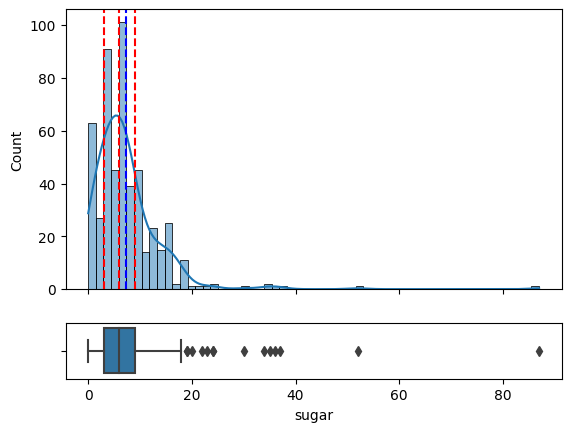

 
count    513.000000
mean       7.272904
std        6.770483
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       87.000000
Name: sugar, dtype: float64
 
lower_whisker: 0
upper_whisker: 18
outlier counts: 14
 
Data skewed with skew: 18.8311469110116
 
Data not normal
--------------------------------------------------
 
11. protein


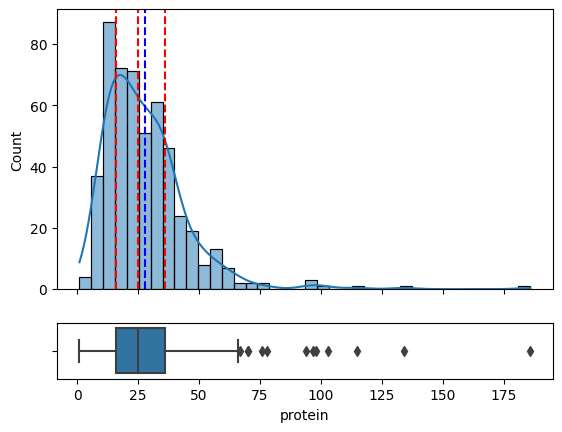

 
count    513.000000
mean      27.923828
std       17.692028
min        1.000000
25%       16.000000
50%       25.000000
75%       36.000000
max      186.000000
Name: protein, dtype: float64
 
lower_whisker: 1.0
upper_whisker: 66.0
outlier counts: 12
 
Data skewed with skew: 15.065449927882524
 
Data not normal
--------------------------------------------------
 
12. vit_a


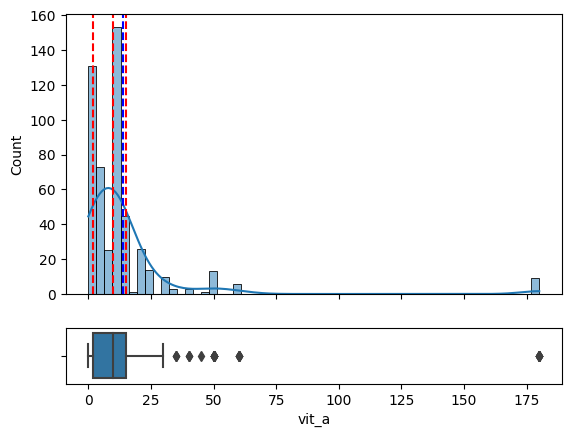

 
count    513.000000
mean      13.910974
std       24.966422
min        0.000000
25%        2.000000
50%       10.000000
75%       15.000000
max      180.000000
Name: vit_a, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 30.0
outlier counts: 35
 
Data skewed with skew: 19.94317937321133
 
Data not normal
--------------------------------------------------
 
13. vit_c


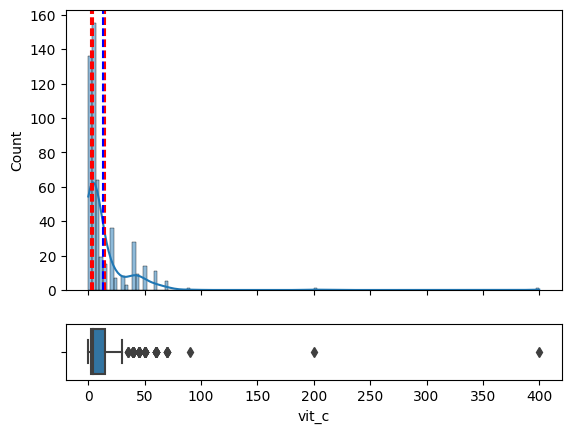

 
count    513.000000
mean      13.448043
std       25.009483
min        0.000000
25%        2.000000
50%        4.538462
75%       15.000000
max      400.000000
Name: vit_c, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 30.0
outlier counts: 73
 
Data skewed with skew: 23.586892811400556
 
Data not normal
--------------------------------------------------
 
14. calcium


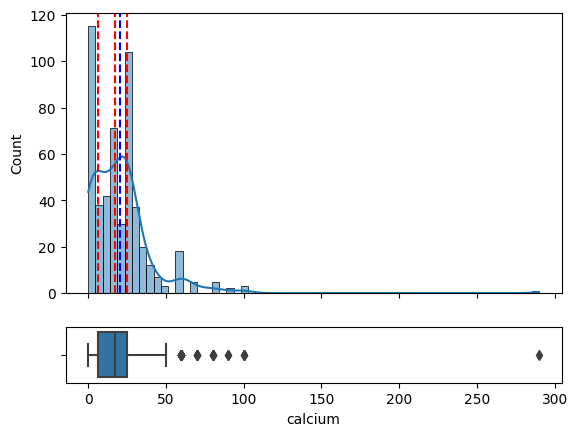

 
count    513.000000
mean      20.456236
std       21.520865
min        0.000000
25%        6.000000
50%       17.360000
75%       25.000000
max      290.000000
Name: calcium, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 50.0
outlier counts: 34
 
Data skewed with skew: 18.990554594000407
 
Data not normal
--------------------------------------------------
 


In [10]:
# Univariate Analysis
# Finding the count, mean, std, min, Q1, Q2, Q3, max for each column. In addition to finding the outlier counts in each column, how much the data is skewed-
# and if the data adopts a normal distribution or not.

y = 1 # Keeping track of the num of loops
# List to store normally distributed columns
norm_data = [] 

# Loop through numerical columns
for x in cont_feats:
    print(f'{y}. {x}')
    
    # Create subplots for histogram and box plot
    fig, ax = plt.subplots(2, 1, sharex = True, gridspec_kw = {'height_ratios':[5,1]})
    
    # Histogram with percentiles and mean lines
    sns.histplot(data = df, x = x, kde = True, ax = ax[0])
    ax[0].axvline(np.nanpercentile(df[x], 25), c='red', linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 50), c='red', linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 75), c='red', linestyle='--')
    ax[0].axvline(np.mean(df[x]), c = 'blue', linestyle = '--')
    
    # Box plot
    sns.boxplot(data = df, x = x, ax = ax[1])
    ax[1].set_xlabel(f'{x}')
    plt.show()
    
    # Print summary statistics
    print(' ')
    print(df[x].describe())
    
    # Outlier detection
    print(' ')
    outlier(df[x])
    
    # Skewness test
    print(' ')
    sk, pval = st.skewtest(df[x])
    if pval < 0.05:
        print(f'Data skewed with skew: {sk}')
    else:
        print(f'Data not skewed')
    
    # Normality test
    print(' ')
    norm, pval = st.normaltest(df[x])
    if pval < 0.05:
        print(f'Data not normal')
    else:
        print(f'Data normal')
        norm_data.append(x)
    
    print('-' * 50)
    print(' ')
    y += 1

# Bivariate Analysis (Inbetween Continuous Features)

1. calories - cal_fat


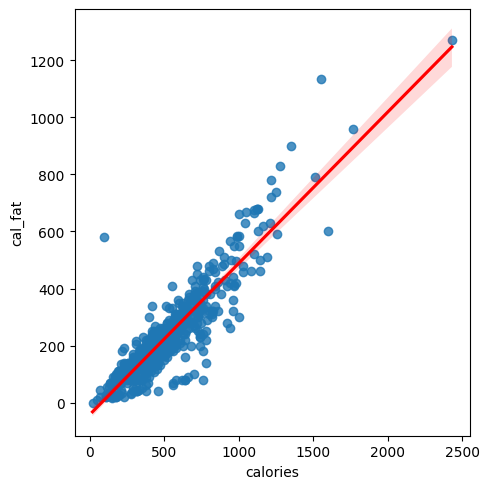

data have Spearman correlation with specification:
corr: 0.874508912147888
pvalue: 1.0564366823858381e-162
High corr between calories and cal_fat
 
 
2. calories - total_fat


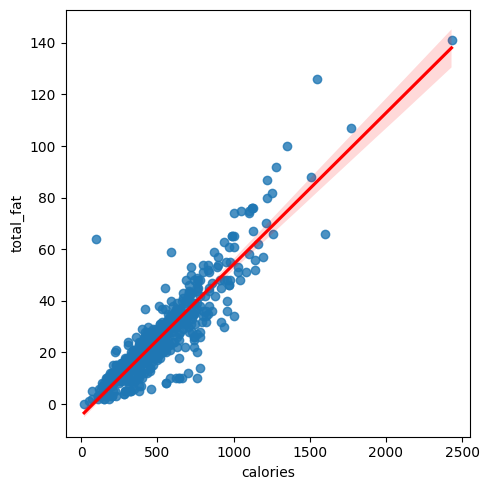

data have Spearman correlation with specification:
corr: 0.8759243747607672
pvalue: 7.05023625687697e-164
High corr between calories and total_fat
 
 
3. calories - sat_fat


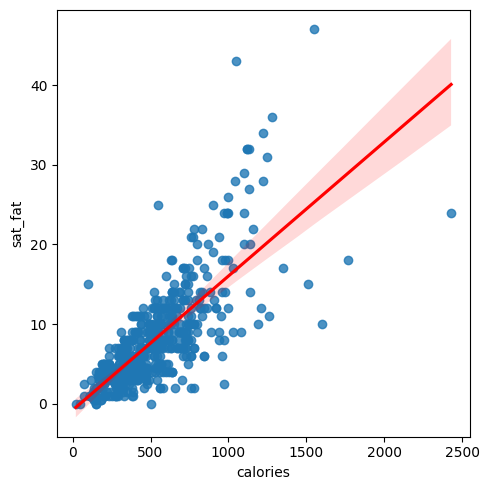

data have Spearman correlation with specification:
corr: 0.7554981592662423
pvalue: 6.592210914098758e-96
High corr between calories and sat_fat
 
 
4. calories - trans_fat


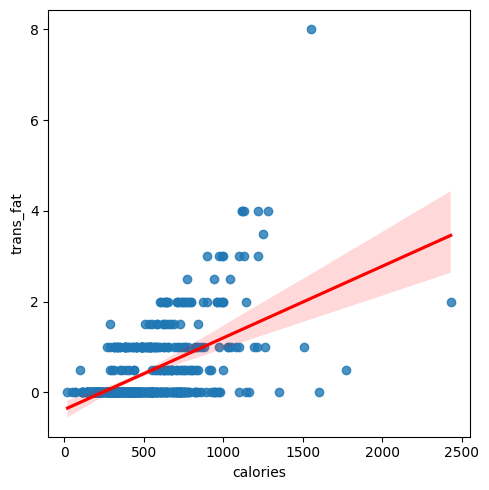

data have Spearman correlation with specification:
corr: 0.4759736160021328
pvalue: 2.2982749879729685e-30
Low corr between calories and trans_fat
 
 
5. calories - cholesterol


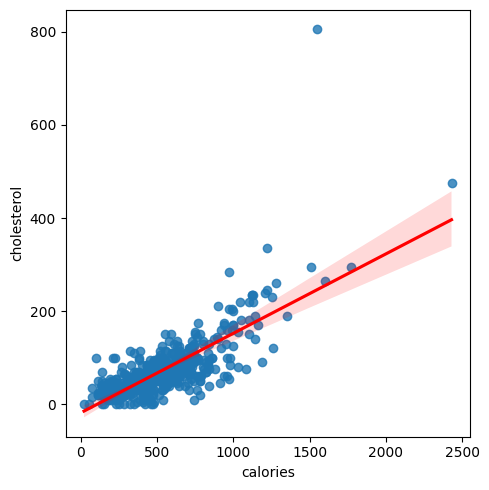

data have Spearman correlation with specification:
corr: 0.7302048737072897
pvalue: 1.4010903123776848e-86
High corr between calories and cholesterol
 
 
6. calories - sodium


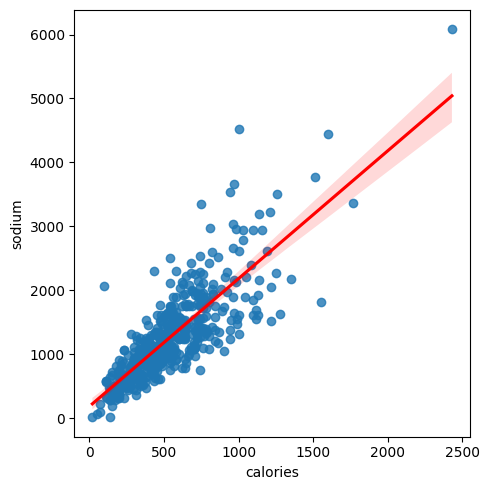

data have Spearman correlation with specification:
corr: 0.8382923586624909
pvalue: 1.0288298569768793e-136
High corr between calories and sodium
 
 
7. calories - total_carb


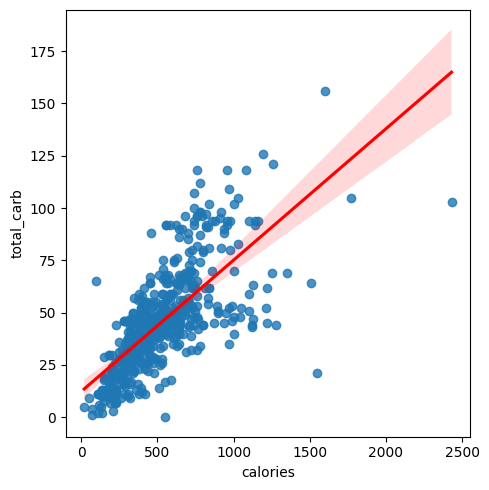

data have Spearman correlation with specification:
corr: 0.779472994929667
pvalue: 7.229507893890886e-106
High corr between calories and total_carb
 
 
8. calories - fiber


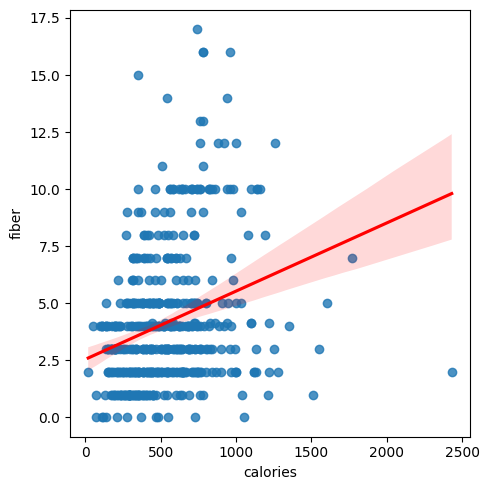

data have Spearman correlation with specification:
corr: 0.3099289670979927
pvalue: 6.962852295664298e-13
Low corr between calories and fiber
 
 
9. calories - sugar


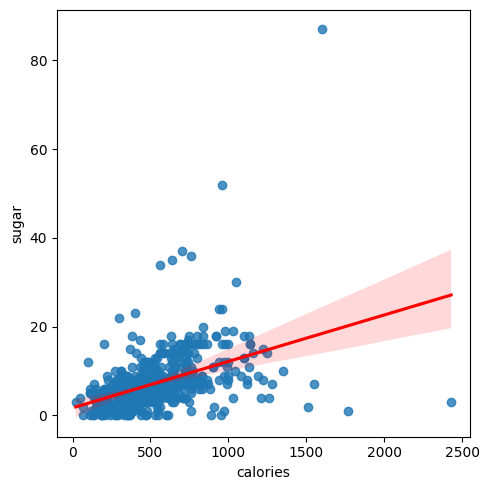

data have Spearman correlation with specification:
corr: 0.5459212432851357
pvalue: 3.4898349564725075e-41
Low corr between calories and sugar
 
 
10. calories - protein


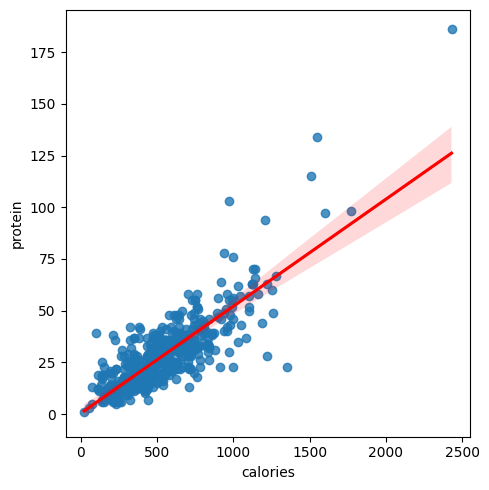

data have Spearman correlation with specification:
corr: 0.7937930010132671
pvalue: 1.9528215484512666e-112
High corr between calories and protein
 
 
11. calories - vit_a


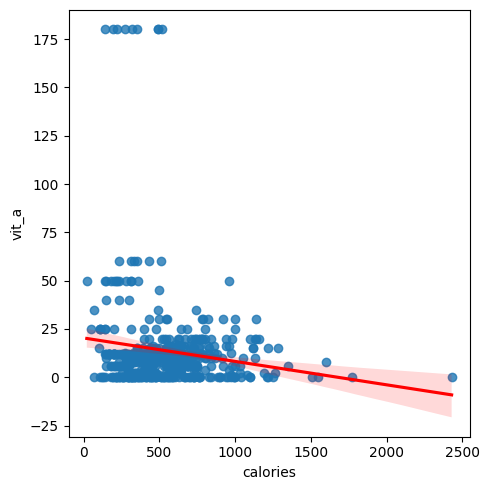

data have Spearman correlation with specification:
corr: -0.03314900683175047
pvalue: 0.45374694997227616
Low corr between calories and vit_a
 
 
12. calories - vit_c


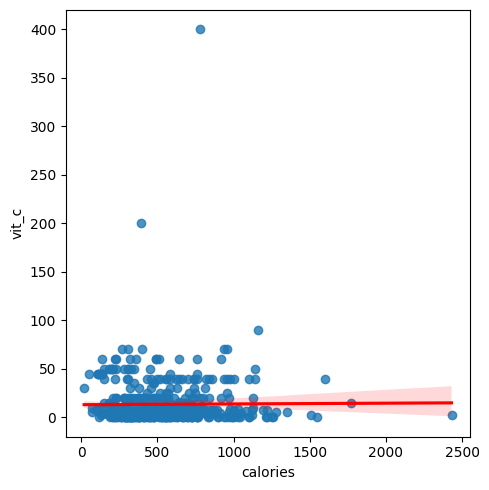

data have Spearman correlation with specification:
corr: 0.015998589567134625
pvalue: 0.7177262212314613
Low corr between calories and vit_c
 
 
13. calories - calcium


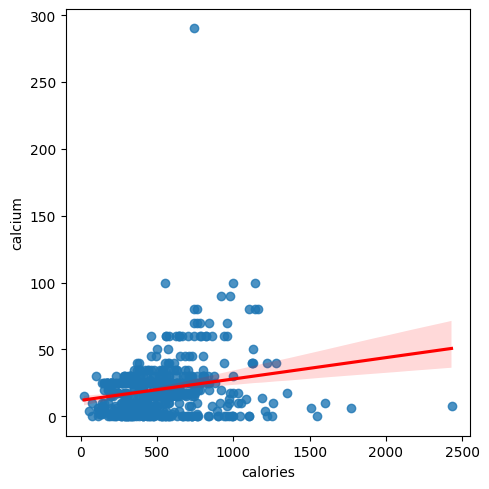

data have Spearman correlation with specification:
corr: 0.1980415406992916
pvalue: 6.200360928198144e-06
Low corr between calories and calcium
 
 
14. cal_fat - total_fat


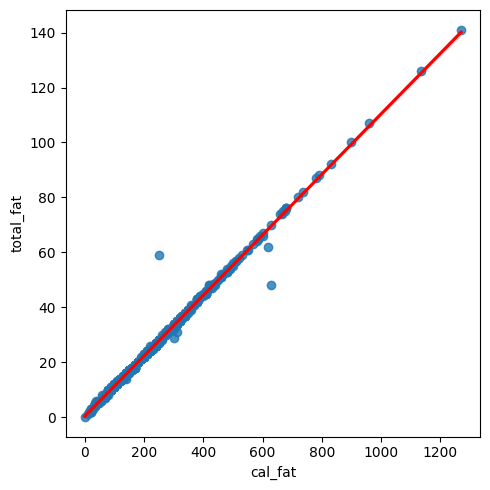

data have Spearman correlation with specification:
corr: 0.9980168698867119
pvalue: 0.0
High corr between cal_fat and total_fat
 
 
15. cal_fat - sat_fat


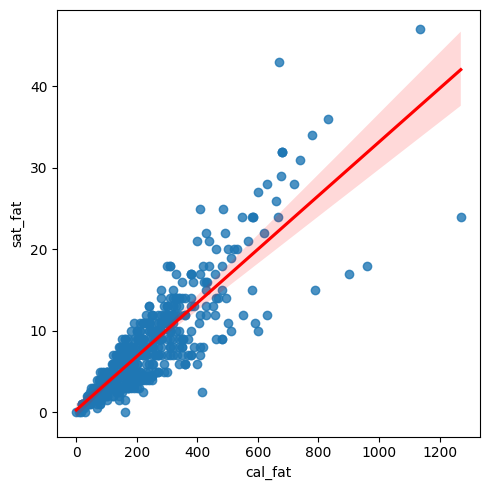

data have Spearman correlation with specification:
corr: 0.8528212848334935
pvalue: 2.7052589954154976e-146
High corr between cal_fat and sat_fat
 
 
16. cal_fat - trans_fat


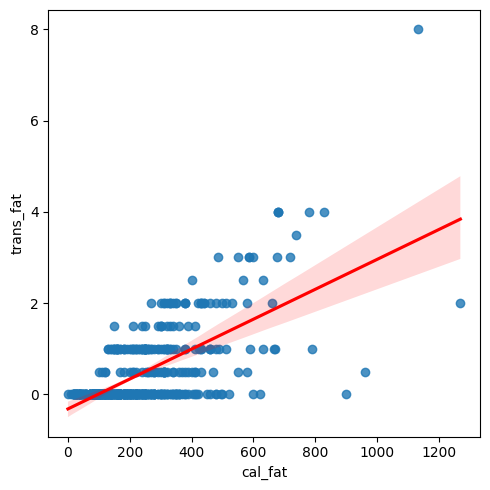

data have Spearman correlation with specification:
corr: 0.5715289279937267
pvalue: 8.036440007552578e-46
Low corr between cal_fat and trans_fat
 
 
17. cal_fat - cholesterol


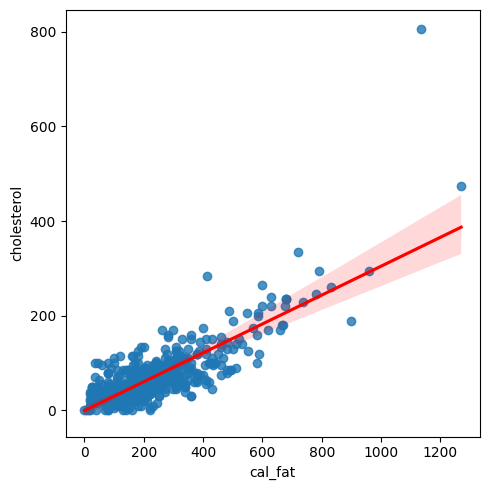

data have Spearman correlation with specification:
corr: 0.7225595540940589
pvalue: 5.7579641359758825e-84
High corr between cal_fat and cholesterol
 
 
18. cal_fat - sodium


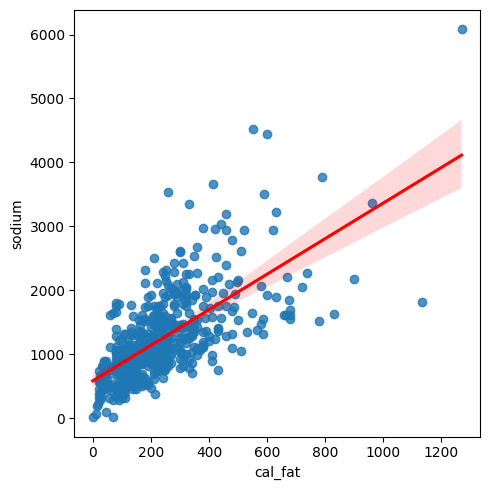

data have Spearman correlation with specification:
corr: 0.7011646580355493
pvalue: 4.259751400071042e-77
High corr between cal_fat and sodium
 
 
19. cal_fat - total_carb


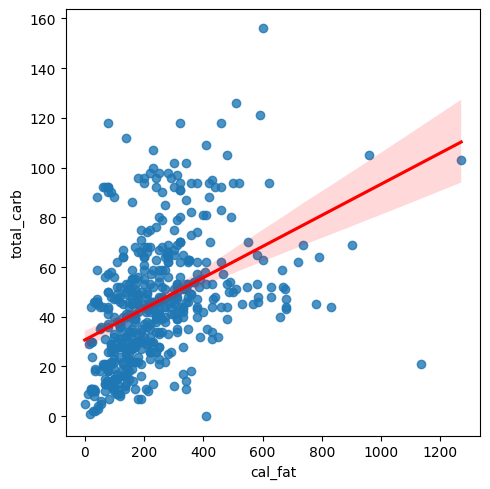

data have Spearman correlation with specification:
corr: 0.5040375522829063
pvalue: 2.0862324910427745e-34
Low corr between cal_fat and total_carb
 
 
20. cal_fat - fiber


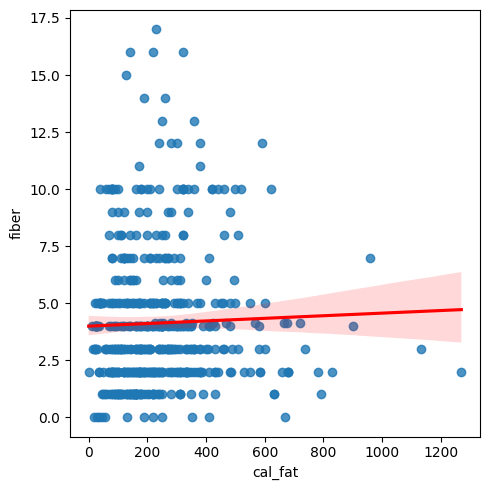

data have Spearman correlation with specification:
corr: 0.08103918657903209
pvalue: 0.06664845548440157
Low corr between cal_fat and fiber
 
 
21. cal_fat - sugar


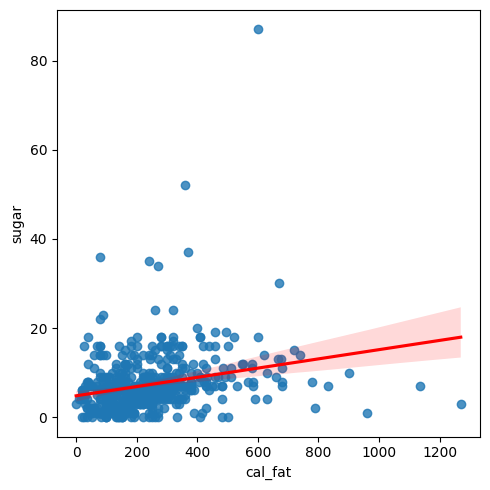

data have Spearman correlation with specification:
corr: 0.3429079225322876
pvalue: 1.335113114564017e-15
Low corr between cal_fat and sugar
 
 
22. cal_fat - protein


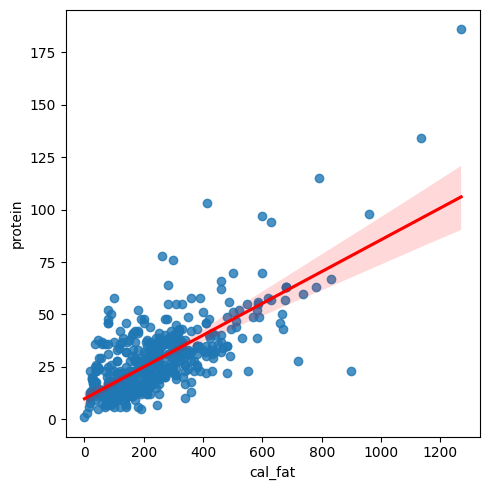

data have Spearman correlation with specification:
corr: 0.630056823499051
pvalue: 4.19913468784508e-58
High corr between cal_fat and protein
 
 
23. cal_fat - vit_a


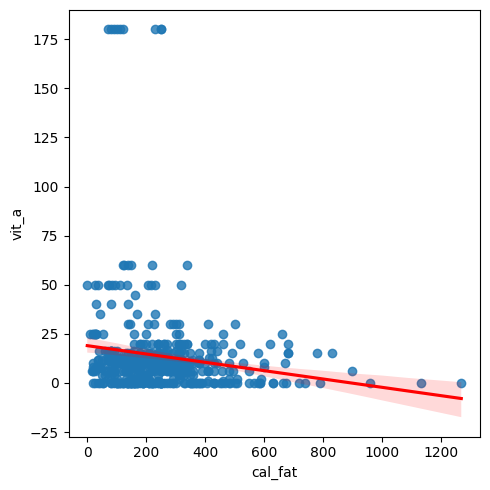

data have Spearman correlation with specification:
corr: -0.15118853432523688
pvalue: 0.0005908913459676866
Low corr between cal_fat and vit_a
 
 
24. cal_fat - vit_c


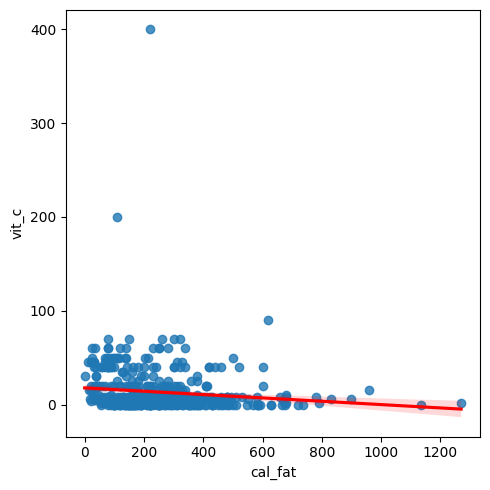

data have Spearman correlation with specification:
corr: -0.17827650714490398
pvalue: 4.8947184503487464e-05
Low corr between cal_fat and vit_c
 
 
25. cal_fat - calcium


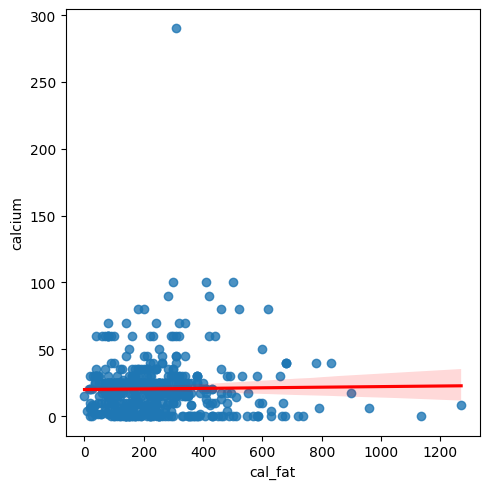

data have Spearman correlation with specification:
corr: -0.02611468930503559
pvalue: 0.5550950937662229
Low corr between cal_fat and calcium
 
 
26. total_fat - sat_fat


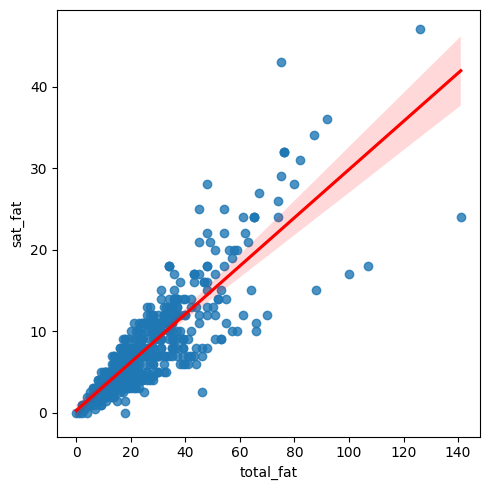

data have Spearman correlation with specification:
corr: 0.8530155937304911
pvalue: 1.9822335859943812e-146
High corr between total_fat and sat_fat
 
 
27. total_fat - trans_fat


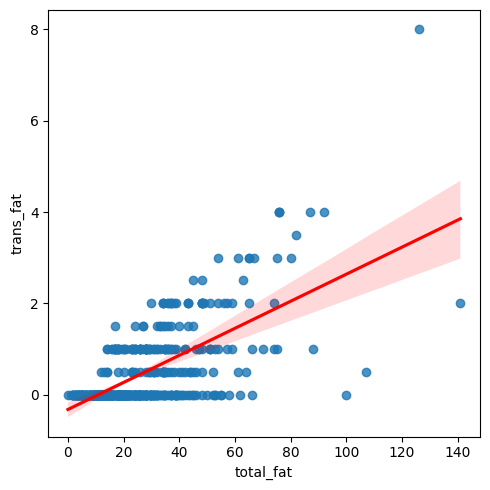

data have Spearman correlation with specification:
corr: 0.5741946246899869
pvalue: 2.503959532396146e-46
Low corr between total_fat and trans_fat
 
 
28. total_fat - cholesterol


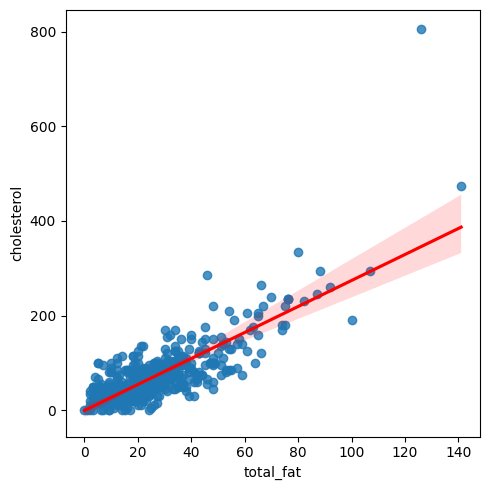

data have Spearman correlation with specification:
corr: 0.7245747523363302
pvalue: 1.201949428305779e-84
High corr between total_fat and cholesterol
 
 
29. total_fat - sodium


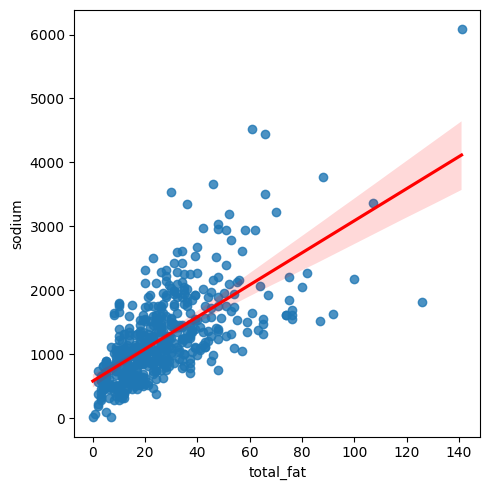

data have Spearman correlation with specification:
corr: 0.7013745776235768
pvalue: 3.6725953460228205e-77
High corr between total_fat and sodium
 
 
30. total_fat - total_carb


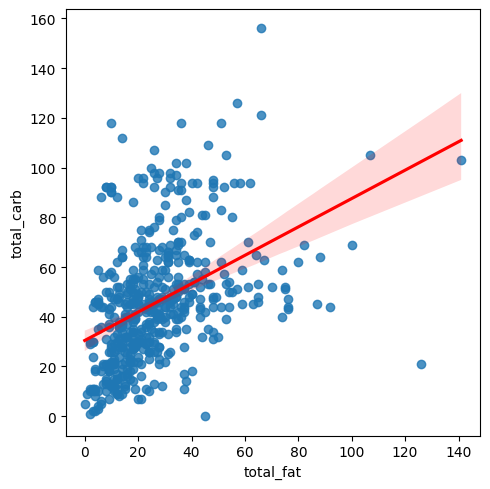

data have Spearman correlation with specification:
corr: 0.50727124220444
pvalue: 6.746740367707958e-35
Low corr between total_fat and total_carb
 
 
31. total_fat - fiber


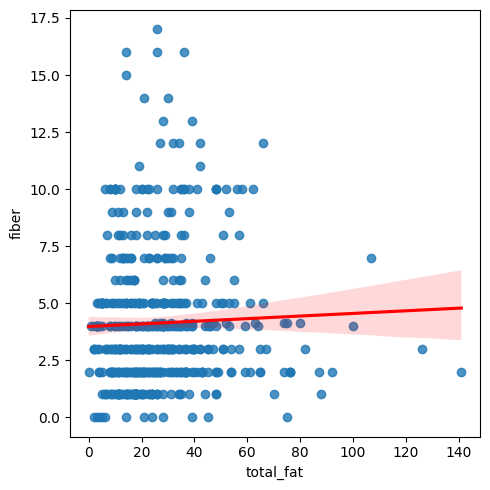

data have Spearman correlation with specification:
corr: 0.08420781390621271
pvalue: 0.056650333614388905
Low corr between total_fat and fiber
 
 
32. total_fat - sugar


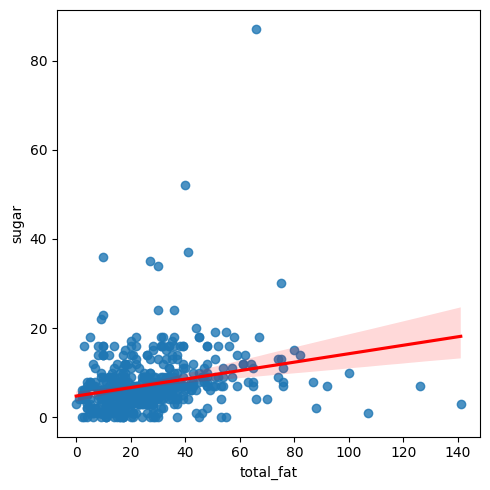

data have Spearman correlation with specification:
corr: 0.34840978023363545
pvalue: 4.360076464198106e-16
Low corr between total_fat and sugar
 
 
33. total_fat - protein


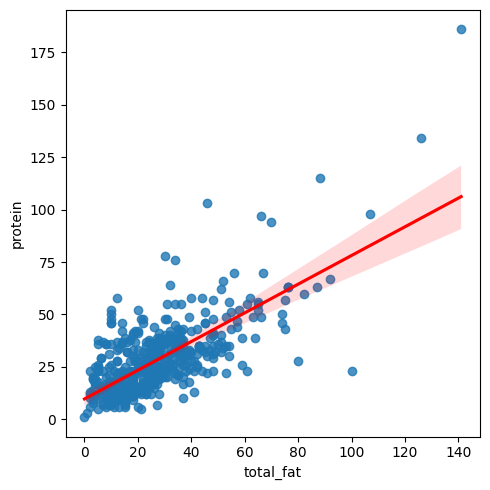

data have Spearman correlation with specification:
corr: 0.6320888193416917
pvalue: 1.4087925400505727e-58
High corr between total_fat and protein
 
 
34. total_fat - vit_a


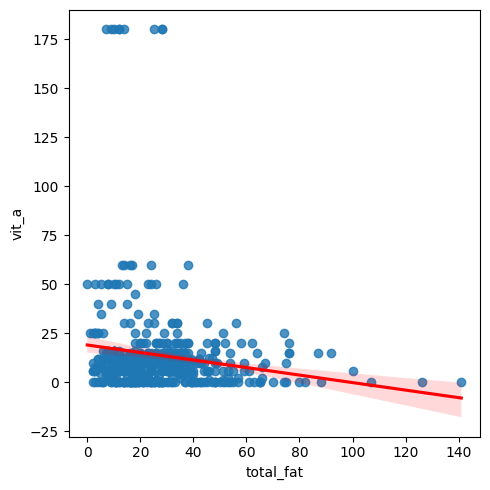

data have Spearman correlation with specification:
corr: -0.15197397366635015
pvalue: 0.0005527060112047949
Low corr between total_fat and vit_a
 
 
35. total_fat - vit_c


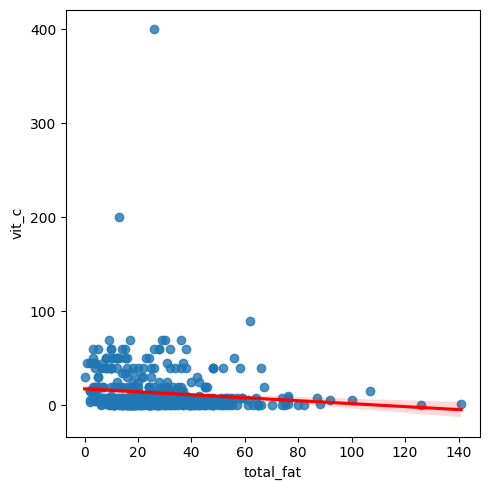

data have Spearman correlation with specification:
corr: -0.17484954620135482
pvalue: 6.853789331141732e-05
Low corr between total_fat and vit_c
 
 
36. total_fat - calcium


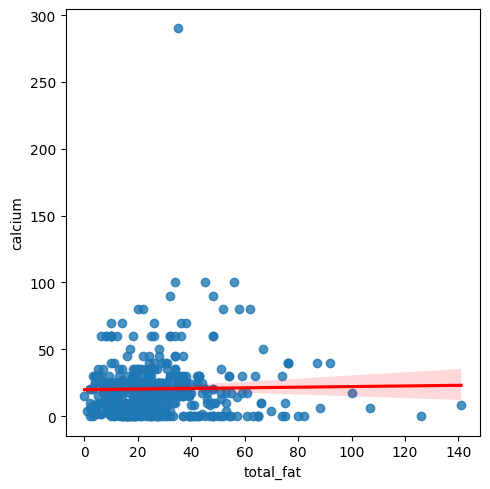

data have Spearman correlation with specification:
corr: -0.024683217783213043
pvalue: 0.5769919972407005
Low corr between total_fat and calcium
 
 
37. sat_fat - trans_fat


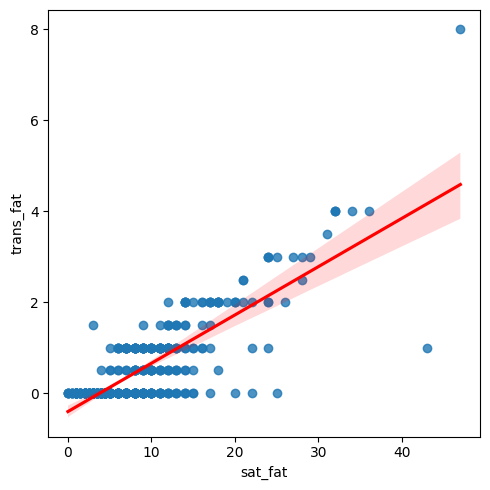

data have Spearman correlation with specification:
corr: 0.7008902414754213
pvalue: 5.170118038611021e-77
High corr between sat_fat and trans_fat
 
 
38. sat_fat - cholesterol


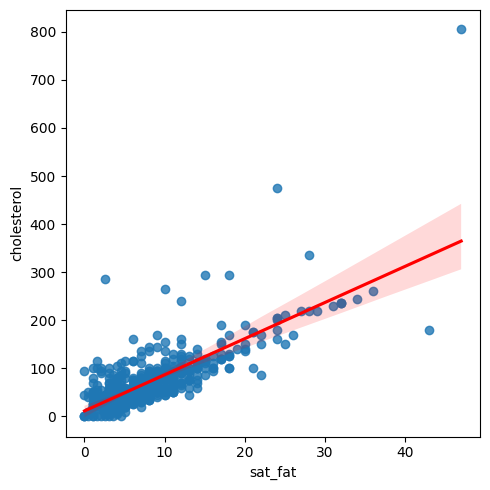

data have Spearman correlation with specification:
corr: 0.7145318548483275
pvalue: 2.5814176730590776e-81
High corr between sat_fat and cholesterol
 
 
39. sat_fat - sodium


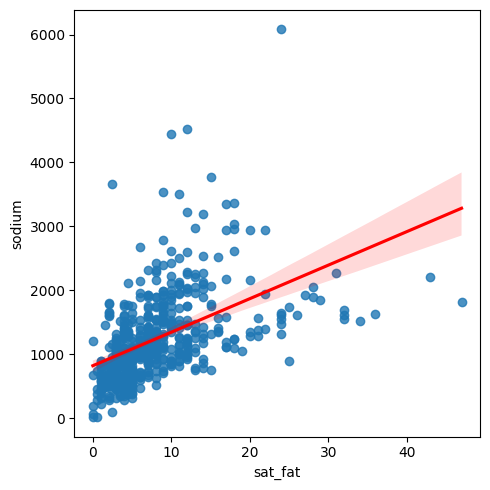

data have Spearman correlation with specification:
corr: 0.6188217185615055
pvalue: 1.5247192745216923e-55
High corr between sat_fat and sodium
 
 
40. sat_fat - total_carb


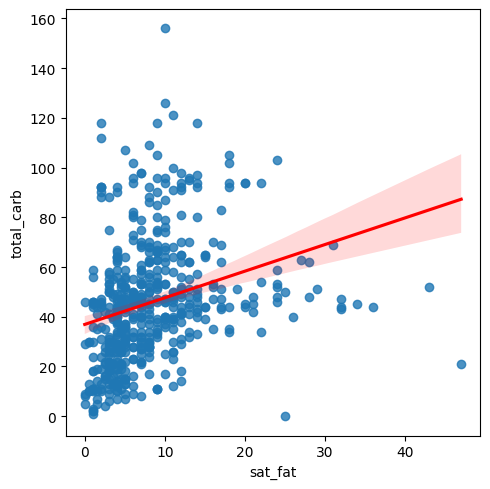

data have Spearman correlation with specification:
corr: 0.41896602350107714
pvalue: 3.189954905152076e-23
Low corr between sat_fat and total_carb
 
 
41. sat_fat - fiber


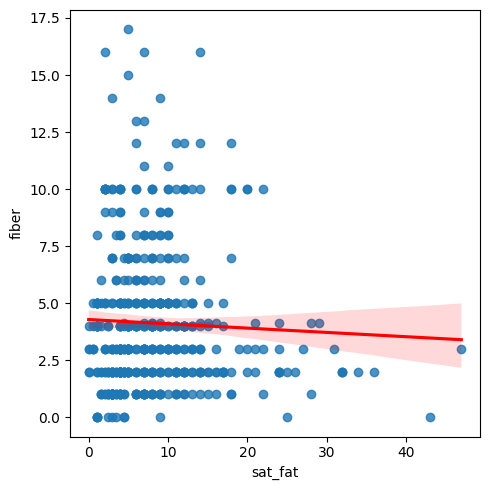

data have Spearman correlation with specification:
corr: 0.05109898953750485
pvalue: 0.24796828332433268
Low corr between sat_fat and fiber
 
 
42. sat_fat - sugar


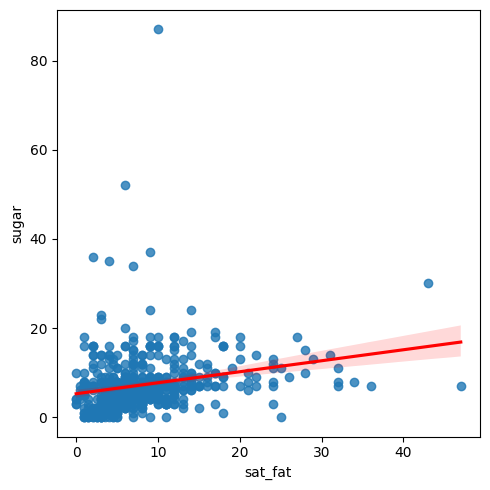

data have Spearman correlation with specification:
corr: 0.36934803785463166
pvalue: 5.017023282526286e-18
Low corr between sat_fat and sugar
 
 
43. sat_fat - protein


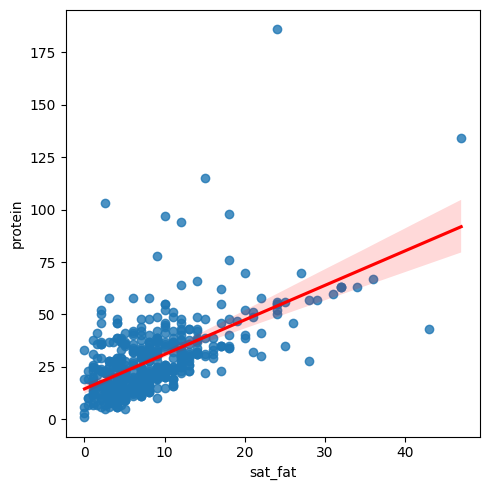

data have Spearman correlation with specification:
corr: 0.5774490568913646
pvalue: 5.943210496939067e-47
Low corr between sat_fat and protein
 
 
44. sat_fat - vit_a


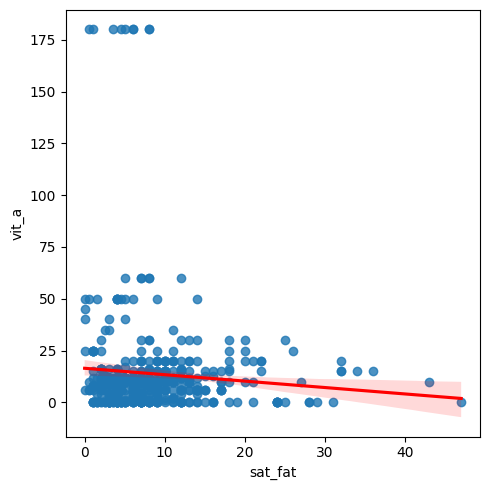

data have Spearman correlation with specification:
corr: 0.003286734874028073
pvalue: 0.940802296519404
Low corr between sat_fat and vit_a
 
 
45. sat_fat - vit_c


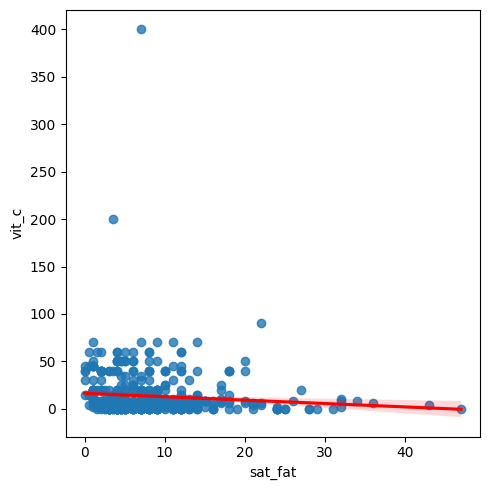

data have Spearman correlation with specification:
corr: -0.11223187174082438
pvalue: 0.010964232212239067
Low corr between sat_fat and vit_c
 
 
46. sat_fat - calcium


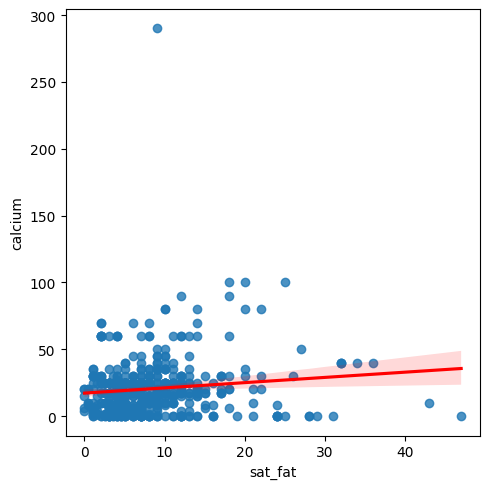

data have Spearman correlation with specification:
corr: 0.12112070406322399
pvalue: 0.006018886109960483
Low corr between sat_fat and calcium
 
 
47. trans_fat - cholesterol


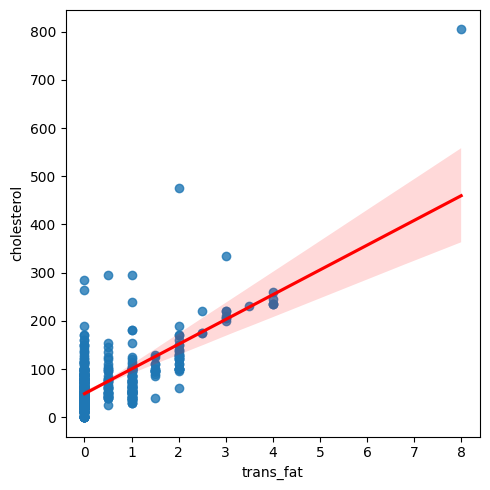

data have Spearman correlation with specification:
corr: 0.4934678306719031
pvalue: 7.68792106718845e-33
Low corr between trans_fat and cholesterol
 
 
48. trans_fat - sodium


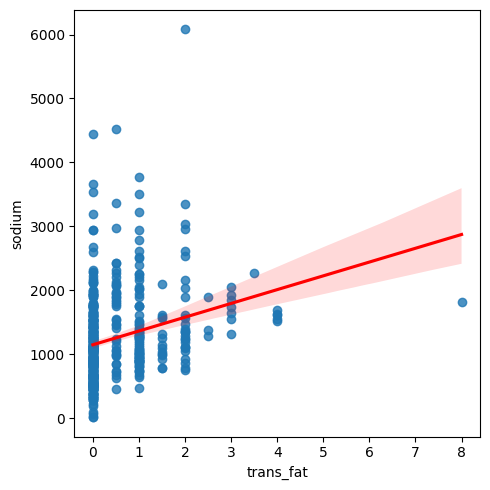

data have Spearman correlation with specification:
corr: 0.32202491320258764
pvalue: 7.66358331342732e-14
Low corr between trans_fat and sodium
 
 
49. trans_fat - total_carb


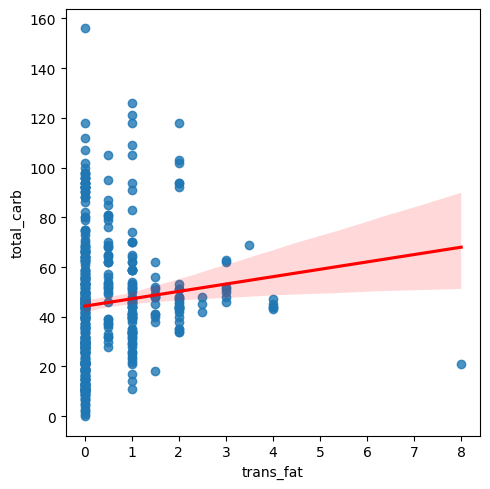

data have Spearman correlation with specification:
corr: 0.1893247221770001
pvalue: 1.583422127985626e-05
Low corr between trans_fat and total_carb
 
 
50. trans_fat - fiber


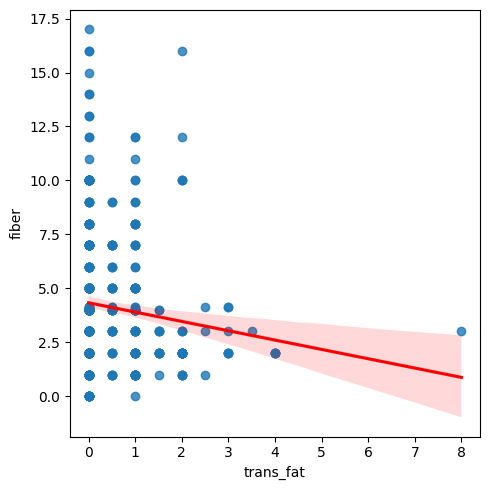

data have Spearman correlation with specification:
corr: -0.12111850514115947
pvalue: 0.006019808037196431
Low corr between trans_fat and fiber
 
 
51. trans_fat - sugar


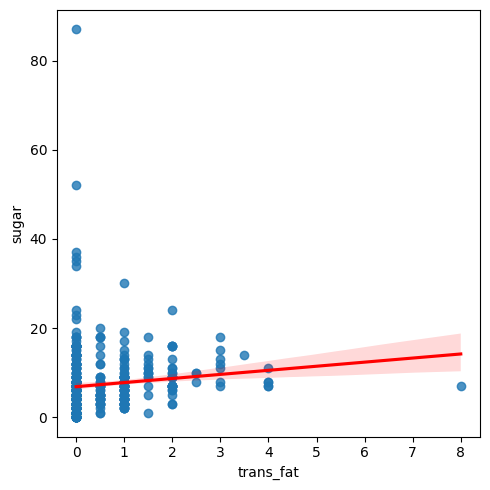

data have Spearman correlation with specification:
corr: 0.25195761479641654
pvalue: 7.190916073241606e-09
Low corr between trans_fat and sugar
 
 
52. trans_fat - protein


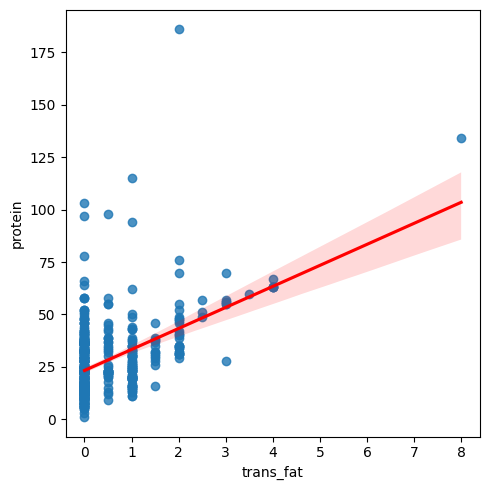

data have Spearman correlation with specification:
corr: 0.36557409358576404
pvalue: 1.1497144234062912e-17
Low corr between trans_fat and protein
 
 
53. trans_fat - vit_a


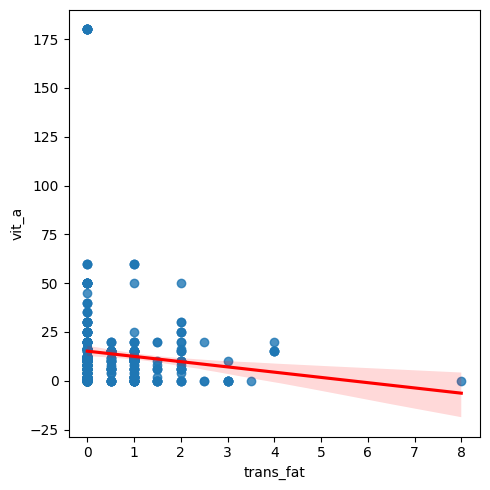

data have Spearman correlation with specification:
corr: -0.0609879647091514
pvalue: 0.1678141028439991
Low corr between trans_fat and vit_a
 
 
54. trans_fat - vit_c


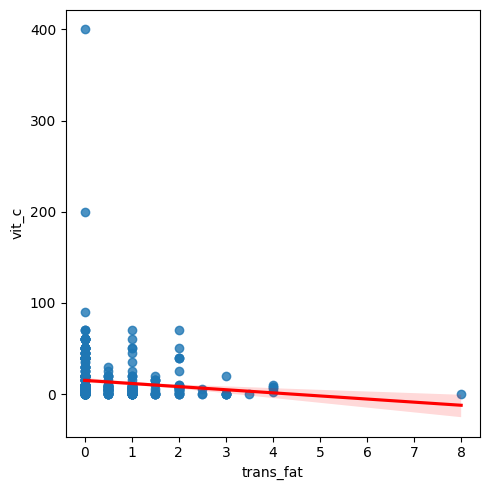

data have Spearman correlation with specification:
corr: -0.1493856789267778
pvalue: 0.0006879859649484199
Low corr between trans_fat and vit_c
 
 
55. trans_fat - calcium


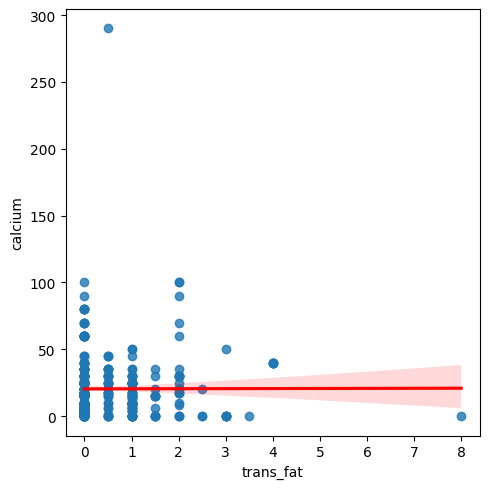

data have Spearman correlation with specification:
corr: -0.006631128538568345
pvalue: 0.8809010755389766
Low corr between trans_fat and calcium
 
 
56. cholesterol - sodium


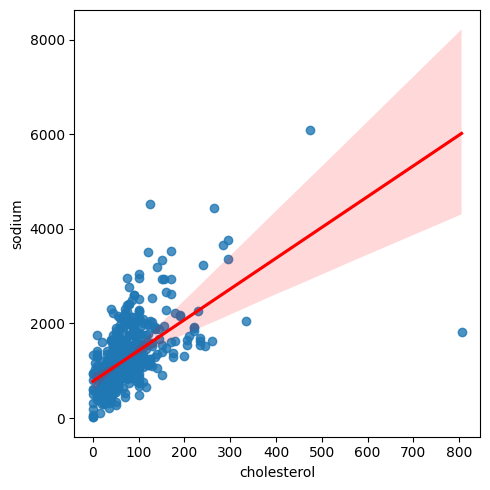

data have Spearman correlation with specification:
corr: 0.6703068133764457
pvalue: 3.3246999730544526e-68
High corr between cholesterol and sodium
 
 
57. cholesterol - total_carb


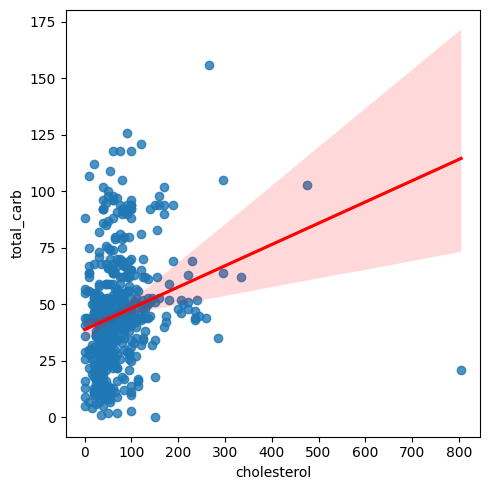

data have Spearman correlation with specification:
corr: 0.3316566636948446
pvalue: 1.2298617933395287e-14
Low corr between cholesterol and total_carb
 
 
58. cholesterol - fiber


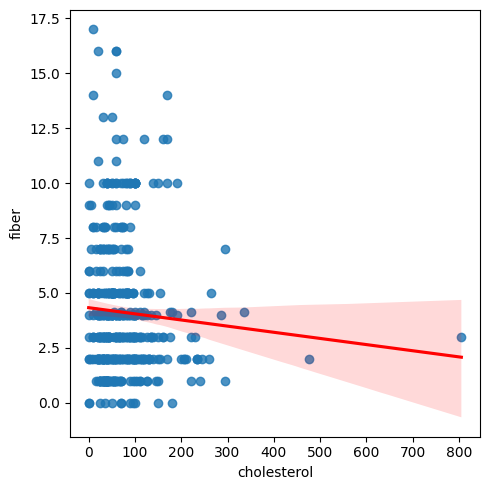

data have Spearman correlation with specification:
corr: -0.027839601920903654
pvalue: 0.5292594057529432
Low corr between cholesterol and fiber
 
 
59. cholesterol - sugar


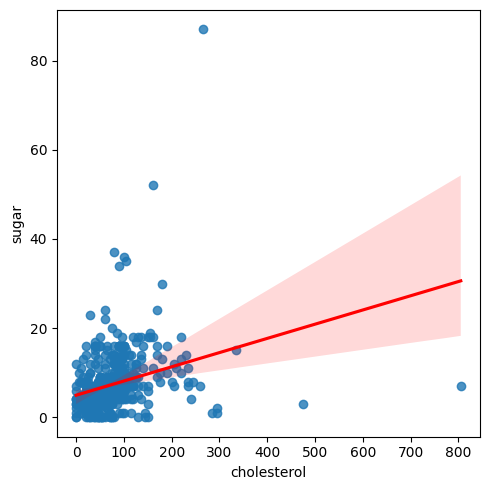

data have Spearman correlation with specification:
corr: 0.4444565247739148
pvalue: 2.994122663606893e-26
Low corr between cholesterol and sugar
 
 
60. cholesterol - protein


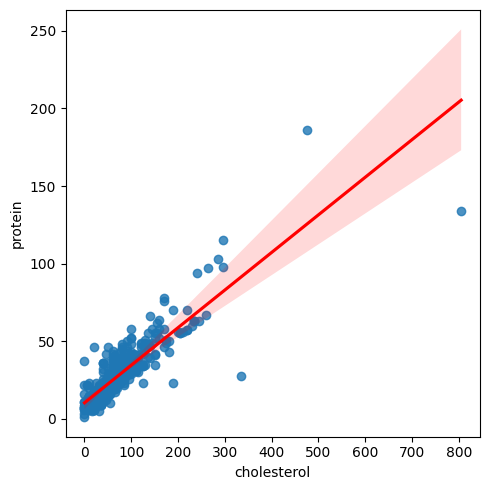

data have Spearman correlation with specification:
corr: 0.8770080111362195
pvalue: 8.6772823564497665e-165
High corr between cholesterol and protein
 
 
61. cholesterol - vit_a


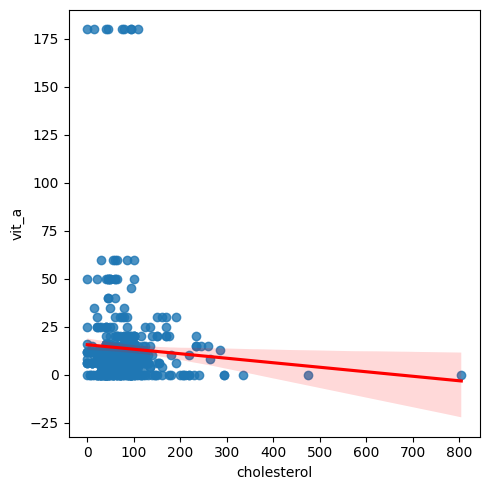

data have Spearman correlation with specification:
corr: -0.07189662376834709
pvalue: 0.10383143951151741
Low corr between cholesterol and vit_a
 
 
62. cholesterol - vit_c


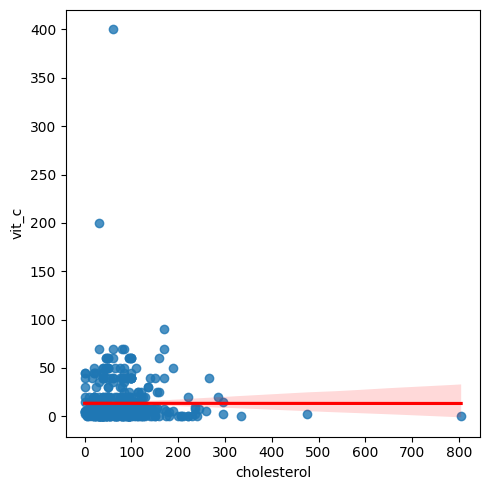

data have Spearman correlation with specification:
corr: 0.0604319132025942
pvalue: 0.1717308948038538
Low corr between cholesterol and vit_c
 
 
63. cholesterol - calcium


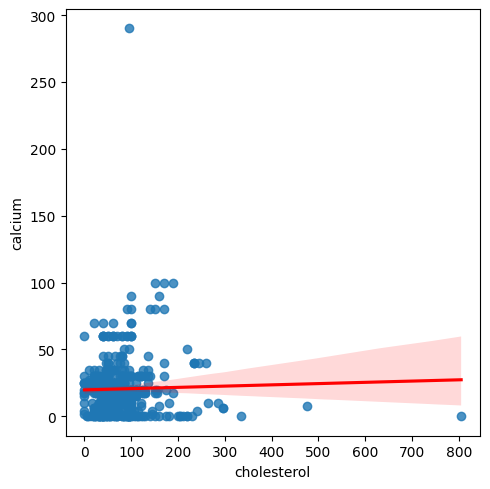

data have Spearman correlation with specification:
corr: -0.0106297629378131
pvalue: 0.8101920095582427
Low corr between cholesterol and calcium
 
 
64. sodium - total_carb


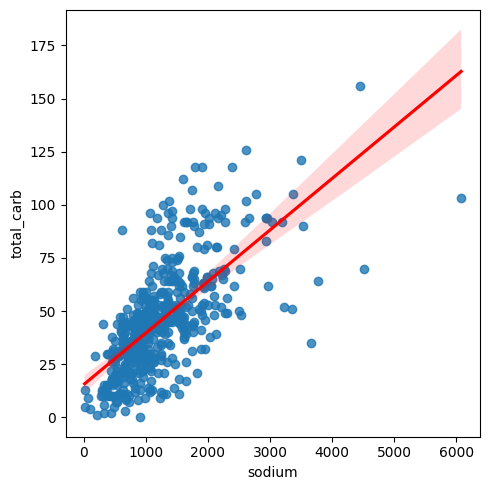

data have Spearman correlation with specification:
corr: 0.7107884637042334
pvalue: 4.141889868353677e-80
High corr between sodium and total_carb
 
 
65. sodium - fiber


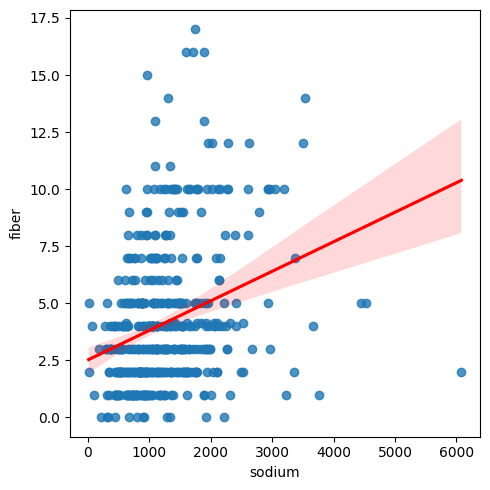

data have Spearman correlation with specification:
corr: 0.3137896663266109
pvalue: 3.480371325206106e-13
Low corr between sodium and fiber
 
 
66. sodium - sugar


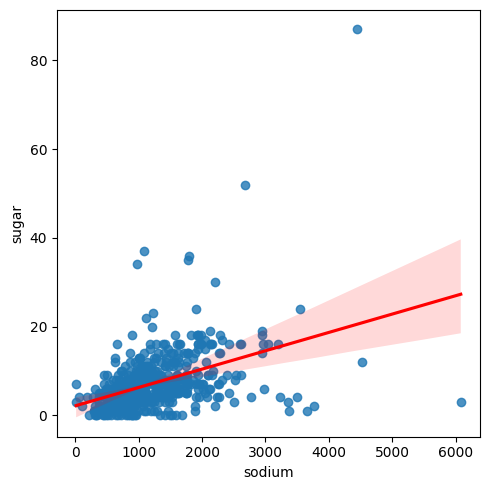

data have Spearman correlation with specification:
corr: 0.48054988572988555
pvalue: 5.340035408909642e-31
Low corr between sodium and sugar
 
 
67. sodium - protein


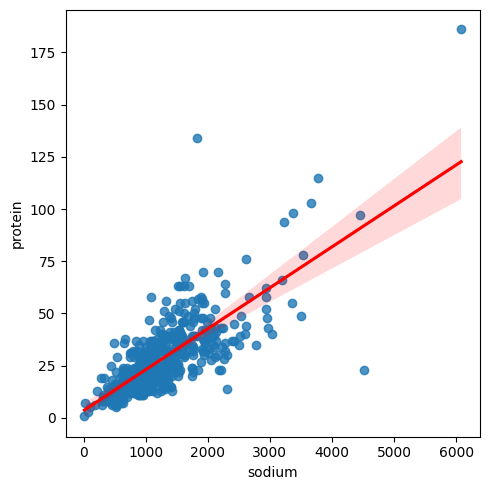

data have Spearman correlation with specification:
corr: 0.7772888869890491
pvalue: 6.570671406010609e-105
High corr between sodium and protein
 
 
68. sodium - vit_a


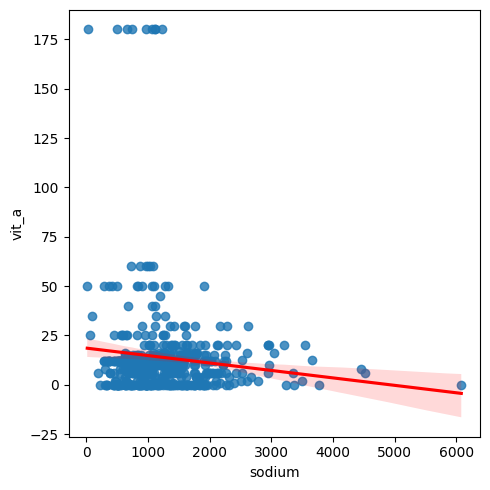

data have Spearman correlation with specification:
corr: -0.009171869399375823
pvalue: 0.8358256379101972
Low corr between sodium and vit_a
 
 
69. sodium - vit_c


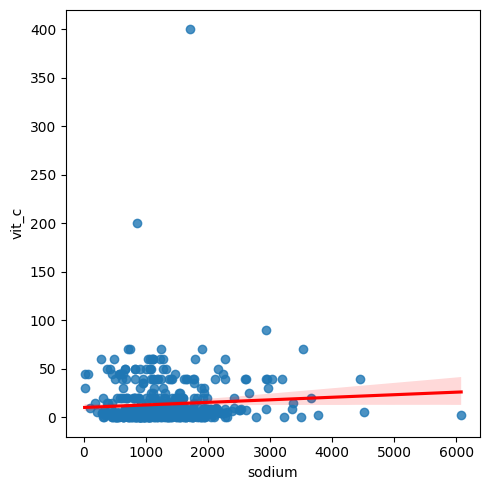

data have Spearman correlation with specification:
corr: 0.1094348367844647
pvalue: 0.013136362387186072
Low corr between sodium and vit_c
 
 
70. sodium - calcium


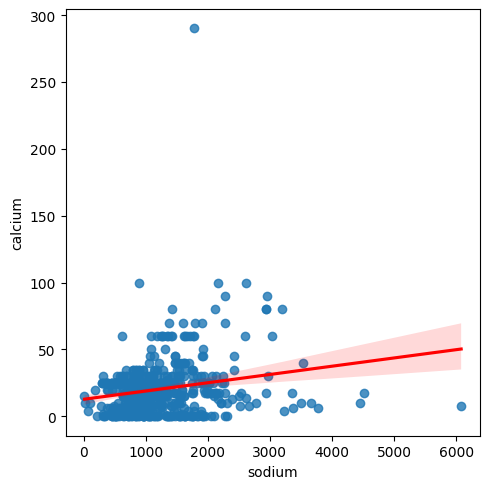

data have Spearman correlation with specification:
corr: 0.1743984223003805
pvalue: 7.160987221064335e-05
Low corr between sodium and calcium
 
 
71. total_carb - fiber


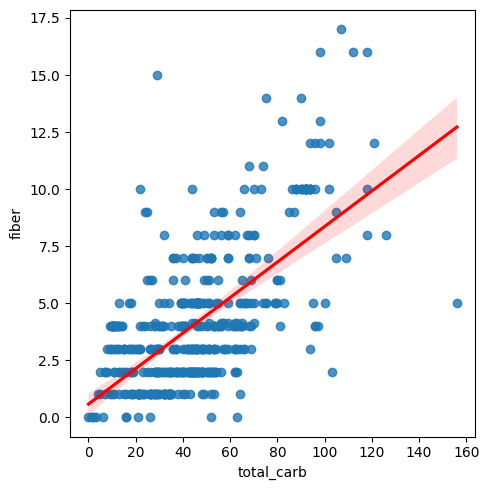

data have Spearman correlation with specification:
corr: 0.5695094575511056
pvalue: 1.9304545747995907e-45
Low corr between total_carb and fiber
 
 
72. total_carb - sugar


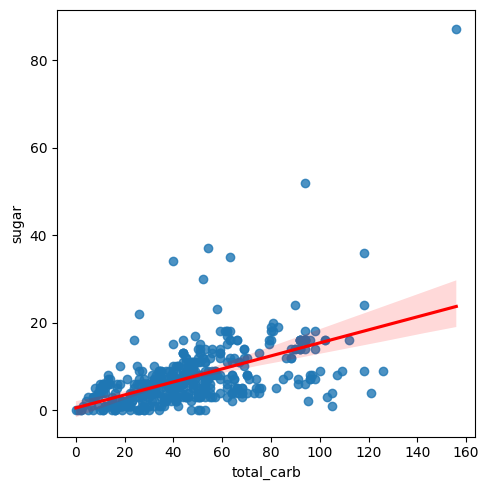

data have Spearman correlation with specification:
corr: 0.5863038734895841
pvalue: 1.093014266579208e-48
Low corr between total_carb and sugar
 
 
73. total_carb - protein


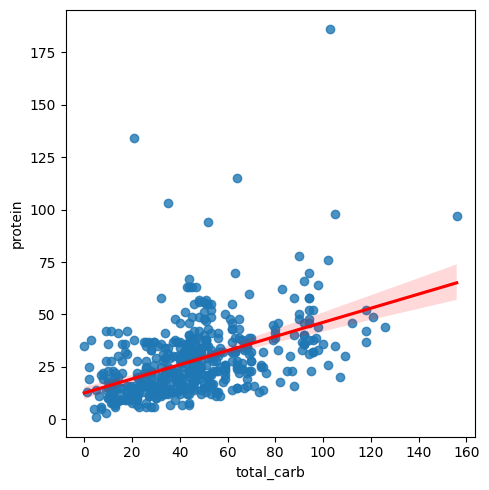

data have Spearman correlation with specification:
corr: 0.5318756515868074
pvalue: 8.346201197870311e-39
Low corr between total_carb and protein
 
 
74. total_carb - vit_a


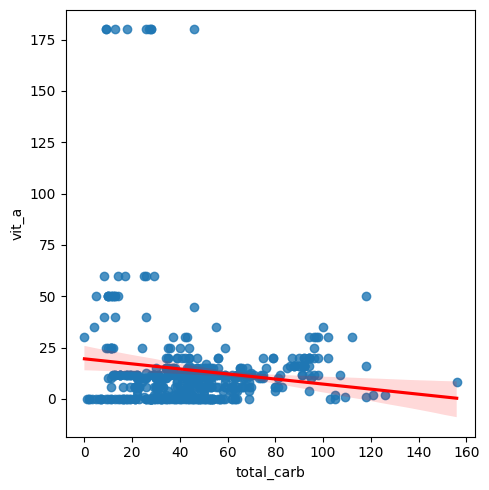

data have Spearman correlation with specification:
corr: 0.06780225711967379
pvalue: 0.12510183916718928
Low corr between total_carb and vit_a
 
 
75. total_carb - vit_c


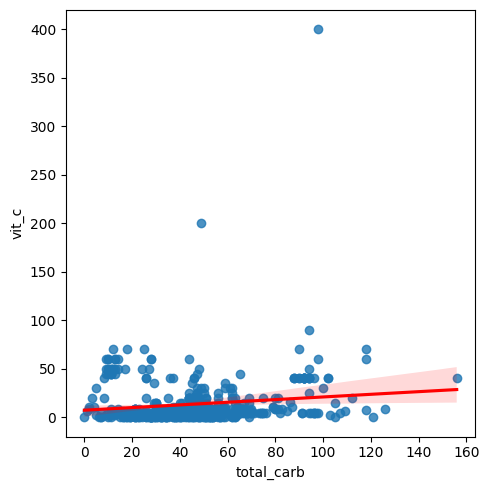

data have Spearman correlation with specification:
corr: 0.16085793333540427
pvalue: 0.0002538791577566449
Low corr between total_carb and vit_c
 
 
76. total_carb - calcium


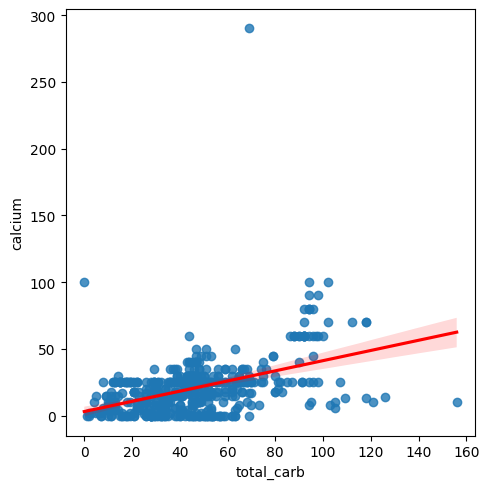

data have Spearman correlation with specification:
corr: 0.4104925505741519
pvalue: 2.846977506163914e-22
Low corr between total_carb and calcium
 
 
77. fiber - sugar


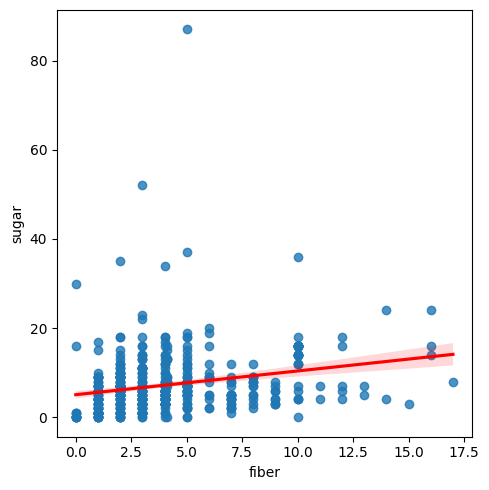

data have Spearman correlation with specification:
corr: 0.2968516404178244
pvalue: 6.770016126225043e-12
Low corr between fiber and sugar
 
 
78. fiber - protein


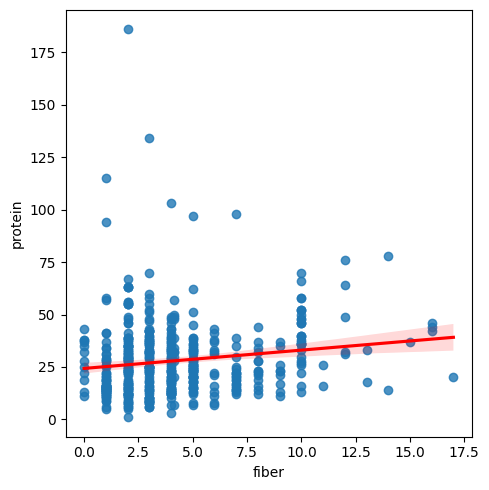

data have Spearman correlation with specification:
corr: 0.17554634890420537
pvalue: 6.40361570402976e-05
Low corr between fiber and protein
 
 
79. fiber - vit_a


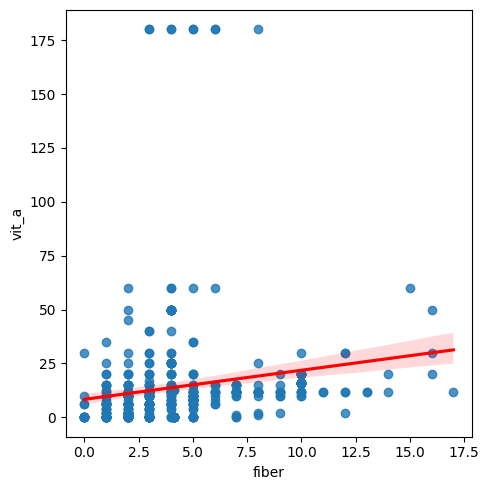

data have Spearman correlation with specification:
corr: 0.4366509434474575
pvalue: 2.6963566502316152e-25
Low corr between fiber and vit_a
 
 
80. fiber - vit_c


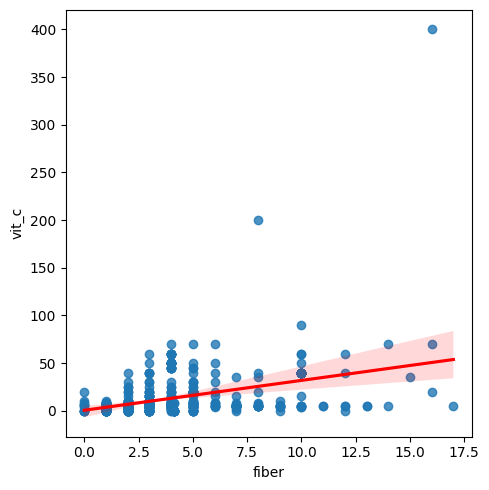

data have Spearman correlation with specification:
corr: 0.4083569218550915
pvalue: 4.894676293869036e-22
Low corr between fiber and vit_c
 
 
81. fiber - calcium


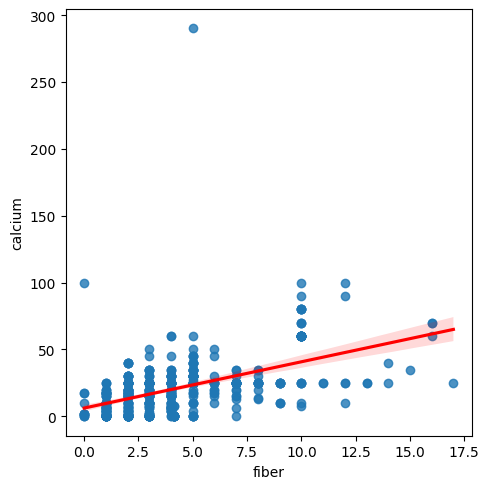

data have Spearman correlation with specification:
corr: 0.5164765194064947
pvalue: 2.537332531133092e-36
Low corr between fiber and calcium
 
 
82. sugar - protein


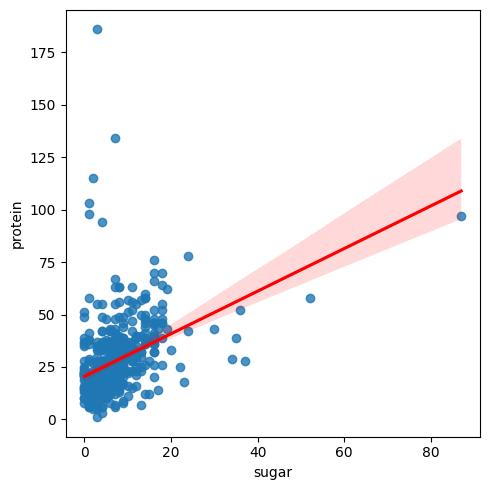

data have Spearman correlation with specification:
corr: 0.5207101097205556
pvalue: 5.4249483438463574e-37
Low corr between sugar and protein
 
 
83. sugar - vit_a


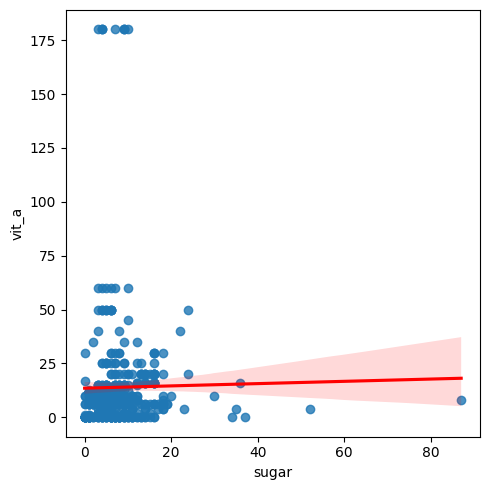

data have Spearman correlation with specification:
corr: 0.12759220470265764
pvalue: 0.0037953305388617074
Low corr between sugar and vit_a
 
 
84. sugar - vit_c


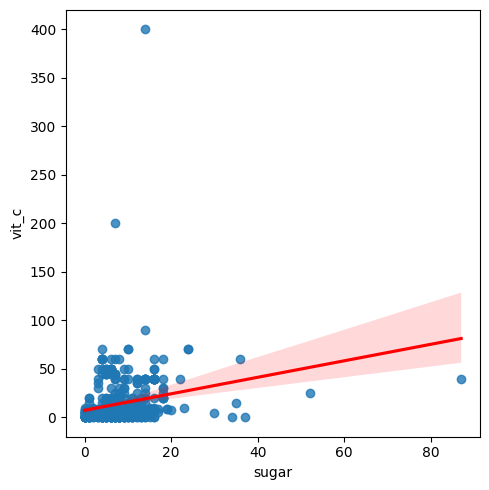

data have Spearman correlation with specification:
corr: 0.33132638708863693
pvalue: 1.3109056805403004e-14
Low corr between sugar and vit_c
 
 
85. sugar - calcium


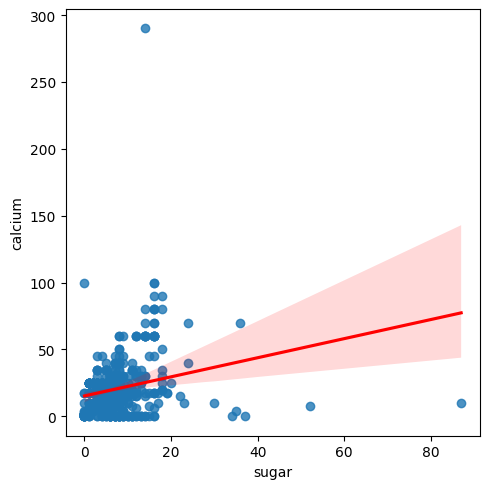

data have Spearman correlation with specification:
corr: 0.24080110888942374
pvalue: 3.348133513252736e-08
Low corr between sugar and calcium
 
 
86. protein - vit_a


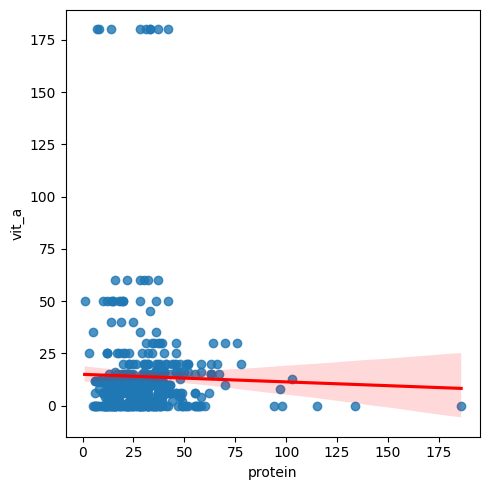

data have Spearman correlation with specification:
corr: 0.023211693419544967
pvalue: 0.5999158456306584
Low corr between protein and vit_a
 
 
87. protein - vit_c


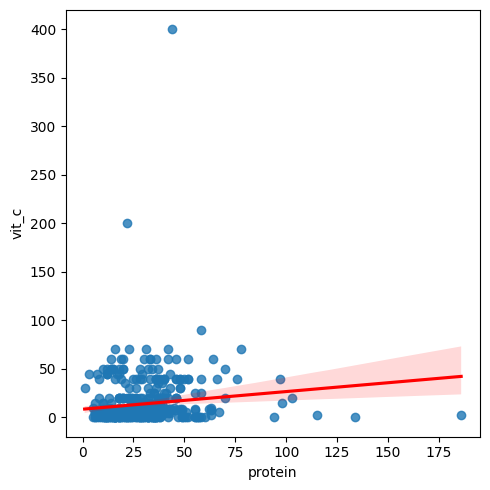

data have Spearman correlation with specification:
corr: 0.20346195728989105
pvalue: 3.38839376501778e-06
Low corr between protein and vit_c
 
 
88. protein - calcium


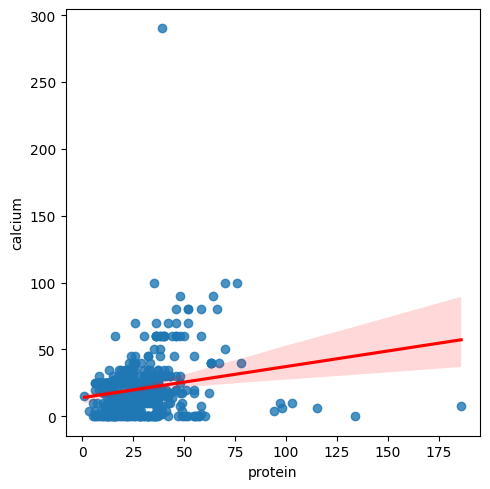

data have Spearman correlation with specification:
corr: 0.1677824029948894
pvalue: 0.00013452888208058546
Low corr between protein and calcium
 
 
89. vit_a - vit_c


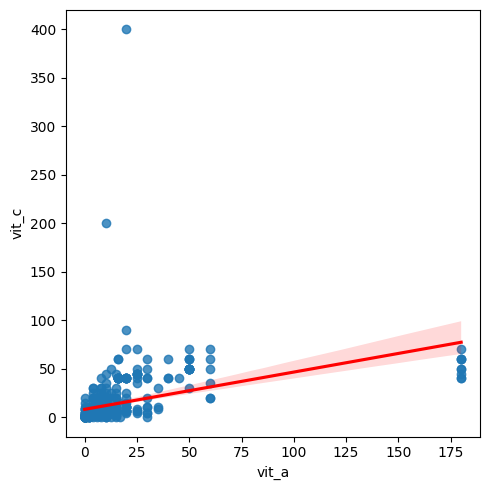

data have Spearman correlation with specification:
corr: 0.6339144037947765
pvalue: 5.244291204881356e-59
High corr between vit_a and vit_c
 
 
90. vit_a - calcium


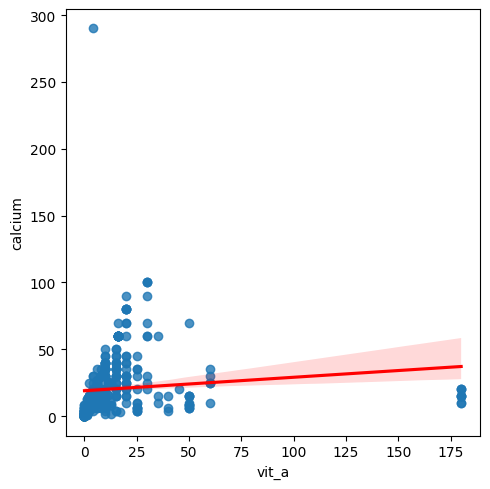

data have Spearman correlation with specification:
corr: 0.6397404143362904
pvalue: 2.140966610604526e-60
High corr between vit_a and calcium
 
 
91. vit_c - calcium


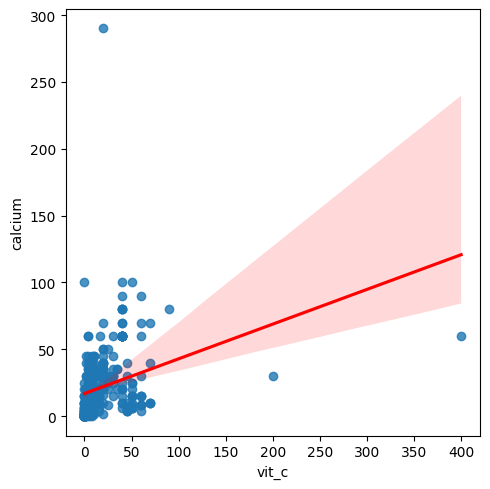

data have Spearman correlation with specification:
corr: 0.5835694462606801
pvalue: 3.803766140117655e-48
Low corr between vit_c and calcium
 
 


In [11]:
# Conducting pairwise correlation analysis between numerical columns, plotting scatter plots, and categorizing correlations as high or low based on thresholds.

# Bivariate Analysis 

y = 1 # Keeping track of the num of loops
high_cor_normal = []
high_cor_not_normal =[]
low_cor = []


# Loop through combinations of numerical columns for bivariate analysis
for col1, col2 in combinations(cont_feats, 2):
    plt.figure(figsize = (5, 5))
    print(f'{y}. {col1} - {col2}')
    
    # Create a scatter plot with a regression line
    sns.regplot(data = df, x = col1, y = col2, line_kws = {'color':'red'})
    plt.tight_layout()
    plt.show()
    
    # Check if both columns are normally distributed
    if (col1 in norm_data) and (col2 in norm_data):
        # Calculate Pearson correlation and p-value
        pear, pval1 = st.pearsonr(df[col1], df[col2])
        print(f'data have Pearson correlation with specification:')
        print(f'corr: {pear}')
        print(f'pvalue: {pval1}')
        
        # Determine if correlation is high or low based on threshold
        if (pear > 0.6) or (pear < -0.6):
            high_cor_normal.append(([col1, col2], pear))
            print(f'High corr between {col1} and {col2}')
        else:
            low_cor.append([col1, col2])
    
    # Calculate Spearman correlation and p-value for non-normally distributed data
    else:
        spear, pval2 = st.spearmanr(df[col1], df[col2])
        print(f'data have Spearman correlation with specification:')
        print(f'corr: {spear}')
        print(f'pvalue: {pval2}')
        
        # Determine if correlation is high or low based on threshold
        if (spear > 0.6) or (spear < -0.6):
            high_cor_not_normal.append(([col1, col2], spear))
            print(f'High corr between {col1} and {col2}')
        else:
            low_cor.append([col1, col2])
            print(f'Low corr between {col1} and {col2}')
    
    print(' ')
    y += 1
    print(' ')

In [12]:
# High correlations
# Normally distributed
print("Normally Distributed: \n")

if not high_cor_normal:
    print("No two correlated features adopt a normal distribution")
else:
    for pair, corr_value in high_cor_normal:
        print(f'High correlation between {pair[0]} and {pair[1]}, Correlation Value: {corr_value:.4f}')

print("="*50)

# Not normally distributed
print("Not Normally Distributed: \n")

if not high_cor_not_normal:
    print("No two correlated features adopt a not normal distribution")
else:
    for pair, corr_value in high_cor_not_normal:
        print(f'High correlation between {pair[0]} and {pair[1]}, Correlation Value: {corr_value:.4f}')


Normally Distributed: 

No two correlated features adopt a normal distribution
Not Normally Distributed: 

High correlation between calories and cal_fat, Correlation Value: 0.8745
High correlation between calories and total_fat, Correlation Value: 0.8759
High correlation between calories and sat_fat, Correlation Value: 0.7555
High correlation between calories and cholesterol, Correlation Value: 0.7302
High correlation between calories and sodium, Correlation Value: 0.8383
High correlation between calories and total_carb, Correlation Value: 0.7795
High correlation between calories and protein, Correlation Value: 0.7938
High correlation between cal_fat and total_fat, Correlation Value: 0.9980
High correlation between cal_fat and sat_fat, Correlation Value: 0.8528
High correlation between cal_fat and cholesterol, Correlation Value: 0.7226
High correlation between cal_fat and sodium, Correlation Value: 0.7012
High correlation between cal_fat and protein, Correlation Value: 0.6301
High corr

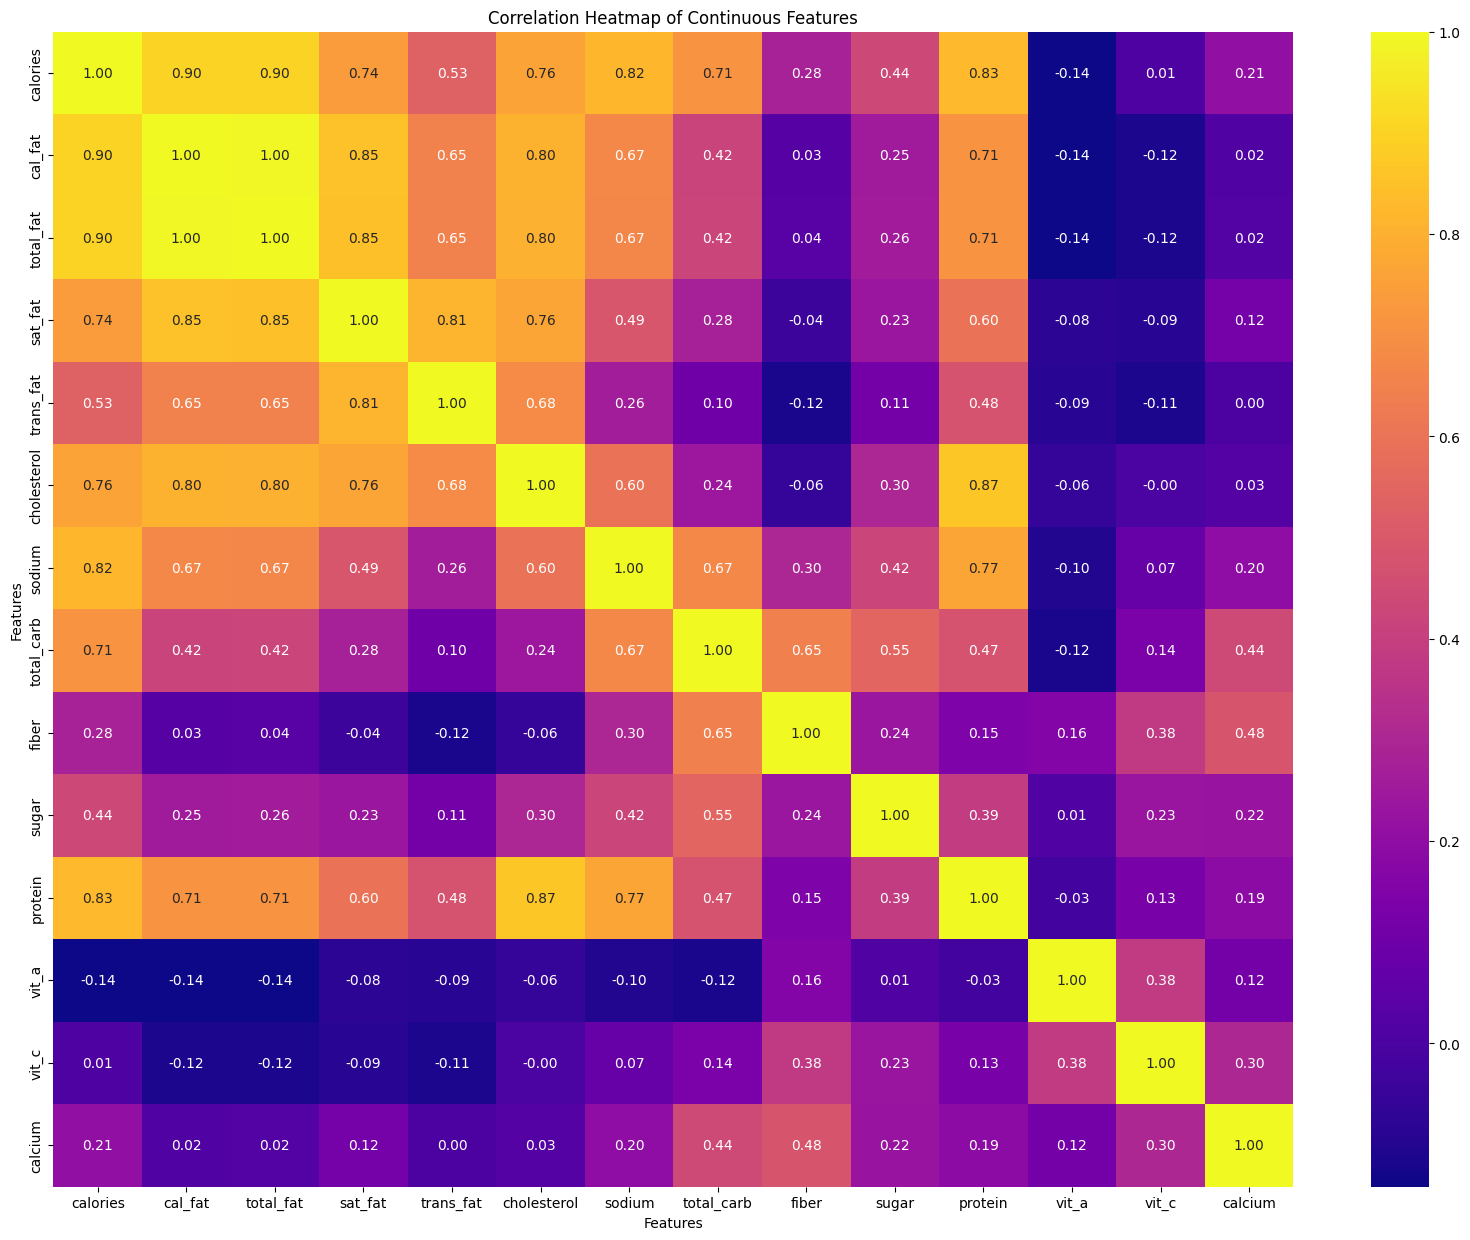

In [13]:
Continuous = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat',
       'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein',
       'vit_a', 'vit_c', 'calcium']

plt.figure(figsize=(20, 15))  
sns.heatmap(df[Continuous].corr(), cmap='plasma', annot=True, fmt=".2f", cbar=True)

# Labels and title
plt.xlabel("Features")
plt.ylabel("Features") 
plt.title("Correlation Heatmap of Continuous Features")

# Show
plt.show()
